# Examples of Dynamic Objective Functions to Compare Our Methods with Others

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Use Objective Wrapper
- to minimize different `foo`s
- or `maximize` them.
- In the latter case, we may need to specify numerical limits to constraint the search-space

/home/bene/anaconda3/envs/mcr/lib/python3.8/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


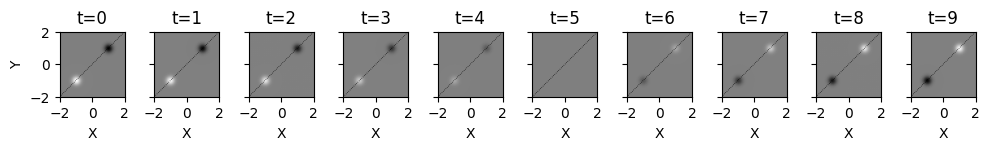

In [4]:
from foobench import Objective
from foobench.dynamic import OscillatingDoubleDip
from foobench.plot import visualize_2D

foo = OscillatingDoubleDip(omega=np.pi*0.1, phi=np.pi)  # set dynamic parameters

objective = Objective(
    dim=2,
    foo=foo,
    foo_kwargs=dict(m=1, v1=1., v2=1.),  # set wrapped parameters
    maximize=True,
)

fig, axes = plt.subplots(1, 10, figsize=(10, 4), sharex=True, sharey=True)

for t, ax in enumerate(axes):
    visualize_2D(objective, parameter_range=2, vmin=-1, vmax=1, ax=ax, title=f"t={t}", cmap="binary")
    ax.plot([-2, 2], [-2, 2], "k:", linewidth=0.5)
    if t > 0:
        ax.set_ylabel("")

plt.tight_layout()
fig.savefig("dynamic_double_peak_landscape.png", transparent=True, dpi=300)

## Perform `"HADES"` optimization with the `benchmark.run` Wrapper
- different `es` implementations might be used, and configured via the `es_config` dictionary parameter
- different `diff` diffusion models (DMs) might be used (below we use `"DDIM"`. Again, the DM can be configured with a `diff_config` dictionary (default configs are located in the `configs` module for all available `diff` DMs.)
- different `nn` neural networks might be used, and configured with the `nn_config` dictionary.
- a destination path `dst` for the output `hdf5` files (logging population parameters, fitness and model loss for every generation for every separate evolutionary run) might be specified, but defaults to `utils.DST`. The `hdf5` files follow a naming scheme defined by `utils.H5_FILE`.
- the evaluation can be turned `quiet`
- see documentation of `run` for more info

In [5]:
import utils
DST = utils.DST + '/paper_HADES/experiment_dynamic'

GENS = 60

foo = OscillatingDoubleDip(omega=np.pi*0.1, phi=np.pi)  # set dynamic parameters
objective = Objective(foo=foo, foo_kwargs=dict(m=1.0, v1=1., v2=1.), dim=2)

In [7]:
from benchmark import run, configs

# make more greedy
cfg = {**configs.HADES}
cfg["buffer_size"] = 1
cfg["diff_lr"] = 3e-3
cfg["diff_max_epoch"] = 100
cfg["selection_pressure"] = 10.
cfg["mutation_rate"] = 0.05
cfg["readaptation"] = False
cfg["forget_best"] = True

rc = [run(objective=Objective(foo=foo, foo_kwargs=dict(m=1.0, v1=1., v2=1.), dim=2),
         generations=GENS,
         es="HADES",
         es_config=cfg,
         diff="DDIM",
         nn="MLP",
         dst=DST,
         )
      for i in range(10)]

# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weight_decay": 0, "diff_optim": "Adam", "diff_lr": 0.003, "diff_weight_decay": 1e-05, "diff_batch_size": 256, "diff_max_epoch": 100, "diff_continuous_training": false, "buffer_size": 1}
# Results are saved 
- in folder `data/es_benchmark/optimize/paper_HADES/experim

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 269.05it/s]


  { "Generation": 0, "Max-Fitness": 0.4602086544036865, "Avg-Fitness": -0.0020241616293787956, "Model-Loss": 0.7283239960670471}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.04it/s]


  { "Generation": 1, "Max-Fitness": 0.8636324405670166, "Avg-Fitness": 0.03842464089393616, "Model-Loss": 0.33040162920951843}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.98it/s]


  { "Generation": 2, "Max-Fitness": 0.7963088154792786, "Avg-Fitness": 0.07746516913175583, "Model-Loss": 0.07722310721874237}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 258.74it/s]


  { "Generation": 3, "Max-Fitness": 0.5798442363739014, "Avg-Fitness": 0.16638760268688202, "Model-Loss": 0.055081963539123535}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.99it/s]


  { "Generation": 4, "Max-Fitness": 0.305184006690979, "Avg-Fitness": 0.09029056131839752, "Model-Loss": 0.05837219953536987}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 258.95it/s]


  { "Generation": 5, "Max-Fitness": -1.5748584346826886e-22, "Avg-Fitness": -2.41769275879285e-16, "Model-Loss": 0.1880299597978592}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 290.67it/s]


  { "Generation": 6, "Max-Fitness": -2.2609977516001127e-16, "Avg-Fitness": -0.03637673705816269, "Model-Loss": 0.27892041206359863}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.05it/s]


  { "Generation": 7, "Max-Fitness": 2.6487059073820873e-15, "Avg-Fitness": -0.03983522206544876, "Model-Loss": 0.37901437282562256}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 156.69it/s]


  { "Generation": 8, "Max-Fitness": 0.022690696641802788, "Avg-Fitness": -0.022160541266202927, "Model-Loss": 0.32505226135253906}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 314.43it/s]


  { "Generation": 9, "Max-Fitness": 0.8242197632789612, "Avg-Fitness": -0.0011800348293036222, "Model-Loss": 0.31032800674438477}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.40it/s]


  { "Generation": 10, "Max-Fitness": 0.9731875658035278, "Avg-Fitness": 0.026202913373708725, "Model-Loss": 0.4111396074295044}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 244.80it/s]


  { "Generation": 11, "Max-Fitness": 0.9446689486503601, "Avg-Fitness": 0.08518239855766296, "Model-Loss": 0.10469358414411545}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 277.22it/s]


  { "Generation": 12, "Max-Fitness": 0.8068951964378357, "Avg-Fitness": 0.22010914981365204, "Model-Loss": 0.0704512968659401}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.81it/s]


  { "Generation": 13, "Max-Fitness": 0.5791324377059937, "Avg-Fitness": 0.17388924956321716, "Model-Loss": 0.06686549633741379}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.74it/s]


  { "Generation": 14, "Max-Fitness": 0.30778947472572327, "Avg-Fitness": 0.09946338087320328, "Model-Loss": 0.0691928043961525}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 277.78it/s]


  { "Generation": 15, "Max-Fitness": 2.6814490247493864e-15, "Avg-Fitness": 7.96711143374396e-16, "Model-Loss": 0.10647175461053848}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 305.57it/s]


  { "Generation": 16, "Max-Fitness": -3.8984818928611276e-08, "Avg-Fitness": -0.09075390547513962, "Model-Loss": 0.23973286151885986}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.21it/s]


  { "Generation": 17, "Max-Fitness": 3.512306819084682e-14, "Avg-Fitness": -0.06647679209709167, "Model-Loss": 0.3560951352119446}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 248.27it/s]


  { "Generation": 18, "Max-Fitness": 9.87874138047573e-09, "Avg-Fitness": -0.050892423838377, "Model-Loss": 0.46006467938423157}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 287.46it/s]


  { "Generation": 19, "Max-Fitness": 7.501523941755295e-05, "Avg-Fitness": -0.04026586562395096, "Model-Loss": 0.5208970308303833}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 305.75it/s]


  { "Generation": 20, "Max-Fitness": 0.14950236678123474, "Avg-Fitness": -0.009471766650676727, "Model-Loss": 0.5560872554779053}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.88it/s]


  { "Generation": 21, "Max-Fitness": 0.7167868614196777, "Avg-Fitness": 0.008417969569563866, "Model-Loss": 0.3750191330909729}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 224.08it/s]


  { "Generation": 22, "Max-Fitness": 0.7942074537277222, "Avg-Fitness": 0.0354769267141819, "Model-Loss": 0.31921976804733276}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.31it/s]


  { "Generation": 23, "Max-Fitness": 0.5589087009429932, "Avg-Fitness": 0.07792376726865768, "Model-Loss": 0.13859449326992035}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.22it/s]


  { "Generation": 24, "Max-Fitness": 0.303109735250473, "Avg-Fitness": 0.06999174505472183, "Model-Loss": 0.06431977450847626}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.66it/s]


  { "Generation": 25, "Max-Fitness": -6.1786125242948325e-25, "Avg-Fitness": -1.768790744068681e-16, "Model-Loss": 0.22631113231182098}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 150.00it/s]


  { "Generation": 26, "Max-Fitness": 2.8080054879480723e-15, "Avg-Fitness": -0.03847343474626541, "Model-Loss": 0.32419896125793457}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.29it/s]


  { "Generation": 27, "Max-Fitness": 1.1762934376546852e-11, "Avg-Fitness": -0.0318789929151535, "Model-Loss": 0.3600277602672577}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.56it/s]


  { "Generation": 28, "Max-Fitness": 1.2293220606807154e-05, "Avg-Fitness": -0.028589919209480286, "Model-Loss": 0.40060850977897644}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 237.00it/s]


  { "Generation": 29, "Max-Fitness": 0.006953009869903326, "Avg-Fitness": -0.012967093847692013, "Model-Loss": 0.5433160066604614}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.22it/s]


  { "Generation": 30, "Max-Fitness": 0.7022179961204529, "Avg-Fitness": 0.00437119510024786, "Model-Loss": 0.3585364520549774}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.76it/s]


  { "Generation": 31, "Max-Fitness": 0.7735849022865295, "Avg-Fitness": 0.020864030346274376, "Model-Loss": 0.22840969264507294}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 176.91it/s]


  { "Generation": 32, "Max-Fitness": 0.7599415183067322, "Avg-Fitness": 0.07442375272512436, "Model-Loss": 0.11790283024311066}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 296.12it/s]


  { "Generation": 33, "Max-Fitness": 0.5827596783638, "Avg-Fitness": 0.1438540667295456, "Model-Loss": 0.07373829931020737}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 153.14it/s]


  { "Generation": 34, "Max-Fitness": 0.3084976375102997, "Avg-Fitness": 0.07888351380825043, "Model-Loss": 0.07016998529434204}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.24it/s]


  { "Generation": 35, "Max-Fitness": 2.9394016856491324e-15, "Avg-Fitness": 8.66020620135104e-16, "Model-Loss": 0.10855839401483536}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 206.44it/s]


  { "Generation": 36, "Max-Fitness": -3.968258965869609e-08, "Avg-Fitness": -0.0730726420879364, "Model-Loss": 0.2540002465248108}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 174.99it/s]


  { "Generation": 37, "Max-Fitness": -2.7765339787928387e-15, "Avg-Fitness": -0.04547574743628502, "Model-Loss": 0.3185727596282959}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 279.47it/s]


  { "Generation": 38, "Max-Fitness": 3.332409489412852e-13, "Avg-Fitness": -0.06325874477624893, "Model-Loss": 0.46303093433380127}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 202.18it/s]


  { "Generation": 39, "Max-Fitness": 5.330042540663271e-08, "Avg-Fitness": -0.03511004149913788, "Model-Loss": 0.5380597710609436}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 149.01it/s]


  { "Generation": 40, "Max-Fitness": 0.0035956832580268383, "Avg-Fitness": -0.01064368337392807, "Model-Loss": 0.603553831577301}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.48it/s]


  { "Generation": 41, "Max-Fitness": 0.10202988982200623, "Avg-Fitness": -0.0067571233958005905, "Model-Loss": 0.5713381171226501}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 146.06it/s]


  { "Generation": 42, "Max-Fitness": 0.7506469488143921, "Avg-Fitness": 0.01935645006597042, "Model-Loss": 0.45491182804107666}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 235.94it/s]


  { "Generation": 43, "Max-Fitness": 0.558414101600647, "Avg-Fitness": 0.045804500579833984, "Model-Loss": 0.07386336475610733}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.41it/s]


  { "Generation": 44, "Max-Fitness": 0.3052852749824524, "Avg-Fitness": 0.08783507347106934, "Model-Loss": 0.07386919111013412}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 218.75it/s]


  { "Generation": 45, "Max-Fitness": -1.6789995347430932e-21, "Avg-Fitness": -1.2542102612080335e-15, "Model-Loss": 0.19563354551792145}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 311.50it/s]


  { "Generation": 46, "Max-Fitness": -1.0302821726456638e-14, "Avg-Fitness": -0.034594520926475525, "Model-Loss": 0.30792737007141113}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.75it/s]


  { "Generation": 47, "Max-Fitness": 1.7468125557140723e-10, "Avg-Fitness": -0.028626699000597, "Model-Loss": 0.38007652759552}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 267.09it/s]


  { "Generation": 48, "Max-Fitness": 0.004511835053563118, "Avg-Fitness": -0.036237042397260666, "Model-Loss": 0.5112042427062988}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.00it/s]


  { "Generation": 49, "Max-Fitness": 0.44096991419792175, "Avg-Fitness": -0.003989832010120153, "Model-Loss": 0.6451147198677063}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 222.93it/s]


  { "Generation": 50, "Max-Fitness": 0.30524662137031555, "Avg-Fitness": -0.0013014910509809852, "Model-Loss": 0.661166787147522}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 151.65it/s]


  { "Generation": 51, "Max-Fitness": 0.9249261021614075, "Avg-Fitness": 0.03266242519021034, "Model-Loss": 0.35814446210861206}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 225.61it/s]


  { "Generation": 52, "Max-Fitness": 0.7970079779624939, "Avg-Fitness": 0.11426709592342377, "Model-Loss": 0.08563174307346344}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 111.25it/s]


  { "Generation": 53, "Max-Fitness": 0.5872503519058228, "Avg-Fitness": 0.14772360026836395, "Model-Loss": 0.07677152007818222}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 277.97it/s]


  { "Generation": 54, "Max-Fitness": 0.3086269795894623, "Avg-Fitness": 0.0848238468170166, "Model-Loss": 0.04993555694818497}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 231.73it/s]


  { "Generation": 55, "Max-Fitness": 3.140107201292223e-15, "Avg-Fitness": 9.750022614090064e-16, "Model-Loss": 0.10675635933876038}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 160.58it/s]


  { "Generation": 56, "Max-Fitness": 2.902217786297616e-15, "Avg-Fitness": -0.07937891781330109, "Model-Loss": 0.35967105627059937}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 264.18it/s]


  { "Generation": 57, "Max-Fitness": 9.545556185763804e-12, "Avg-Fitness": -0.056993670761585236, "Model-Loss": 0.3798321485519409}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 173.40it/s]


  { "Generation": 58, "Max-Fitness": 1.582893128215801e-05, "Avg-Fitness": -0.034775905311107635, "Model-Loss": 0.496700644493103}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.20it/s]


  { "Generation": 59, "Max-Fitness": 0.0777953490614891, "Avg-Fitness": -0.02147146314382553, "Model-Loss": 0.504558265209198}
  { "Generation": 59, "Max-Fitness": 0.0777953490614891, "Avg-Fitness": -0.02147146314382553, "Model-Loss": 0.504558265209198}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weight_decay

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 252.99it/s]


  { "Generation": 0, "Max-Fitness": 0.3047507107257843, "Avg-Fitness": -0.0044198064133524895, "Model-Loss": 0.7344053983688354}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.33it/s]


  { "Generation": 1, "Max-Fitness": 0.6504847407341003, "Avg-Fitness": 0.00889310147613287, "Model-Loss": 0.39668095111846924}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 158.49it/s]


  { "Generation": 2, "Max-Fitness": 0.796428382396698, "Avg-Fitness": 0.07139462977647781, "Model-Loss": 0.06315629184246063}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 209.78it/s]


  { "Generation": 3, "Max-Fitness": 0.5792620778083801, "Avg-Fitness": 0.1544448733329773, "Model-Loss": 0.06840414553880692}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 254.80it/s]


  { "Generation": 4, "Max-Fitness": 0.30682799220085144, "Avg-Fitness": 0.0874074399471283, "Model-Loss": 0.06152884662151337}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 292.28it/s]


  { "Generation": 5, "Max-Fitness": 3.422746213923222e-15, "Avg-Fitness": 9.744232085104397e-16, "Model-Loss": 0.12567082047462463}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 216.39it/s]


  { "Generation": 6, "Max-Fitness": -1.566238627779149e-14, "Avg-Fitness": -0.06922571361064911, "Model-Loss": 0.28097617626190186}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.97it/s]


  { "Generation": 7, "Max-Fitness": 3.780787464244088e-15, "Avg-Fitness": -0.0651024580001831, "Model-Loss": 0.37052908539772034}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.44it/s]


  { "Generation": 8, "Max-Fitness": 8.144052793257472e-11, "Avg-Fitness": -0.06350317597389221, "Model-Loss": 0.4169405996799469}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 191.63it/s]


  { "Generation": 9, "Max-Fitness": 0.27429866790771484, "Avg-Fitness": -0.022330138832330704, "Model-Loss": 0.4120238721370697}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 309.84it/s]


  { "Generation": 10, "Max-Fitness": 0.8969243764877319, "Avg-Fitness": 0.014155116863548756, "Model-Loss": 0.3744925558567047}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.52it/s]


  { "Generation": 11, "Max-Fitness": 0.9086078405380249, "Avg-Fitness": 0.05351633578538895, "Model-Loss": 0.12822850048542023}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.15it/s]


  { "Generation": 12, "Max-Fitness": 0.7711551189422607, "Avg-Fitness": 0.20708057284355164, "Model-Loss": 0.06206132099032402}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.12it/s]


  { "Generation": 13, "Max-Fitness": 0.5860053896903992, "Avg-Fitness": 0.1839766949415207, "Model-Loss": 0.041798025369644165}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.54it/s]


  { "Generation": 14, "Max-Fitness": 0.3087880611419678, "Avg-Fitness": 0.0926709920167923, "Model-Loss": 0.06356263905763626}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.27it/s]


  { "Generation": 15, "Max-Fitness": 3.360189230878466e-15, "Avg-Fitness": 9.863782315279869e-16, "Model-Loss": 0.11417026072740555}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 254.95it/s]


  { "Generation": 16, "Max-Fitness": -8.638155435392036e-08, "Avg-Fitness": -0.08321629464626312, "Model-Loss": 0.2563825845718384}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 239.93it/s]


  { "Generation": 17, "Max-Fitness": 7.069982620178106e-13, "Avg-Fitness": -0.06919130682945251, "Model-Loss": 0.3277266323566437}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 287.52it/s]


  { "Generation": 18, "Max-Fitness": 1.7600714272703044e-05, "Avg-Fitness": -0.03104124404489994, "Model-Loss": 0.42132431268692017}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.02it/s]


  { "Generation": 19, "Max-Fitness": 0.0039389776065945625, "Avg-Fitness": -0.021186314523220062, "Model-Loss": 0.33223748207092285}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.85it/s]


  { "Generation": 20, "Max-Fitness": 0.4767777919769287, "Avg-Fitness": -0.0017143397126346827, "Model-Loss": 0.2859959602355957}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 240.64it/s]


  { "Generation": 21, "Max-Fitness": 0.9148379564285278, "Avg-Fitness": 0.03963068500161171, "Model-Loss": 0.13707710802555084}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.09it/s]


  { "Generation": 22, "Max-Fitness": 0.787255585193634, "Avg-Fitness": 0.1983041763305664, "Model-Loss": 0.07779232412576675}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 260.36it/s]


  { "Generation": 23, "Max-Fitness": 0.5869873762130737, "Avg-Fitness": 0.19426962733268738, "Model-Loss": 0.08211667835712433}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.75it/s]


  { "Generation": 24, "Max-Fitness": 0.3078513741493225, "Avg-Fitness": 0.08932481706142426, "Model-Loss": 0.04774289205670357}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 175.69it/s]


  { "Generation": 25, "Max-Fitness": -4.86417850383209e-23, "Avg-Fitness": -1.0209734923135759e-15, "Model-Loss": 0.20842483639717102}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 325.77it/s]


  { "Generation": 26, "Max-Fitness": -4.722053998168177e-18, "Avg-Fitness": -0.045416459441185, "Model-Loss": 0.34757810831069946}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.42it/s]


  { "Generation": 27, "Max-Fitness": 2.136677640374174e-11, "Avg-Fitness": -0.03823796287178993, "Model-Loss": 0.510321855545044}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 321.47it/s]


  { "Generation": 28, "Max-Fitness": 2.131521057435748e-07, "Avg-Fitness": -0.027506977319717407, "Model-Loss": 0.4982736110687256}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 189.92it/s]


  { "Generation": 29, "Max-Fitness": 0.021703263744711876, "Avg-Fitness": -0.005517581943422556, "Model-Loss": 0.41736921668052673}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 306.09it/s]


  { "Generation": 30, "Max-Fitness": 0.026347575709223747, "Avg-Fitness": 9.163416689261794e-05, "Model-Loss": 0.43840503692626953}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 199.19it/s]


  { "Generation": 31, "Max-Fitness": 0.7503699064254761, "Avg-Fitness": 0.01504771038889885, "Model-Loss": 0.281705379486084}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 281.72it/s]


  { "Generation": 32, "Max-Fitness": 0.7857368588447571, "Avg-Fitness": 0.08444340527057648, "Model-Loss": 0.10095962136983871}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.11it/s]


  { "Generation": 33, "Max-Fitness": 0.5849233865737915, "Avg-Fitness": 0.16791002452373505, "Model-Loss": 0.044560160487890244}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 227.20it/s]


  { "Generation": 34, "Max-Fitness": 0.296642929315567, "Avg-Fitness": 0.09095562249422073, "Model-Loss": 0.08231661468744278}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.14it/s]


  { "Generation": 35, "Max-Fitness": 3.642050667263886e-15, "Avg-Fitness": 1.1664798824873534e-15, "Model-Loss": 0.1160089299082756}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 309.98it/s]


  { "Generation": 36, "Max-Fitness": -3.4190947295620333e-10, "Avg-Fitness": -0.10005553811788559, "Model-Loss": 0.27606889605522156}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 278.86it/s]


  { "Generation": 37, "Max-Fitness": 8.067241400724554e-14, "Avg-Fitness": -0.06807073205709457, "Model-Loss": 0.31201305985450745}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.61it/s]


  { "Generation": 38, "Max-Fitness": 7.2707044829201095e-09, "Avg-Fitness": -0.04822661355137825, "Model-Loss": 0.31712961196899414}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 244.05it/s]


  { "Generation": 39, "Max-Fitness": 0.0035421920474618673, "Avg-Fitness": -0.017459966242313385, "Model-Loss": 0.3560996651649475}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.27it/s]


  { "Generation": 40, "Max-Fitness": 0.15220680832862854, "Avg-Fitness": -0.001230023568496108, "Model-Loss": 0.40326204895973206}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 226.19it/s]


  { "Generation": 41, "Max-Fitness": 0.3861801326274872, "Avg-Fitness": 0.008956477046012878, "Model-Loss": 0.19394341111183167}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 305.13it/s]


  { "Generation": 42, "Max-Fitness": 0.7503008246421814, "Avg-Fitness": 0.077577605843544, "Model-Loss": 0.07400690019130707}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.23it/s]


  { "Generation": 43, "Max-Fitness": 0.5826844573020935, "Avg-Fitness": 0.174747496843338, "Model-Loss": 0.0692957416176796}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 217.68it/s]


  { "Generation": 44, "Max-Fitness": 0.3040634095668793, "Avg-Fitness": 0.08003082871437073, "Model-Loss": 0.09561783075332642}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 281.10it/s]


  { "Generation": 45, "Max-Fitness": 3.918971148709734e-15, "Avg-Fitness": 9.823117322273374e-16, "Model-Loss": 0.11059894412755966}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 166.15it/s]


  { "Generation": 46, "Max-Fitness": -1.8490328157483304e-09, "Avg-Fitness": -0.08125489950180054, "Model-Loss": 0.23139017820358276}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.72it/s]


  { "Generation": 47, "Max-Fitness": 1.821118331690741e-07, "Avg-Fitness": -0.06676304340362549, "Model-Loss": 0.3552836775779724}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 174.68it/s]


  { "Generation": 48, "Max-Fitness": 0.0005934697692282498, "Avg-Fitness": -0.06310947984457016, "Model-Loss": 0.3938813805580139}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.60it/s]


  { "Generation": 49, "Max-Fitness": 0.8589991331100464, "Avg-Fitness": -0.011562559753656387, "Model-Loss": 0.4291384816169739}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 233.83it/s]


  { "Generation": 50, "Max-Fitness": 0.962468147277832, "Avg-Fitness": 0.005057451315224171, "Model-Loss": 0.48358553647994995}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 303.32it/s]


  { "Generation": 51, "Max-Fitness": 0.9186988472938538, "Avg-Fitness": 0.06201142072677612, "Model-Loss": 0.12045959383249283}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.14it/s]


  { "Generation": 52, "Max-Fitness": 0.802850067615509, "Avg-Fitness": 0.20864775776863098, "Model-Loss": 0.05994744226336479}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.50it/s]


  { "Generation": 53, "Max-Fitness": 0.5666815042495728, "Avg-Fitness": 0.15974442660808563, "Model-Loss": 0.07730661332607269}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 324.46it/s]


  { "Generation": 54, "Max-Fitness": 0.30872440338134766, "Avg-Fitness": 0.08214902877807617, "Model-Loss": 0.09537383913993835}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 246.42it/s]


  { "Generation": 55, "Max-Fitness": 3.9121826031539644e-15, "Avg-Fitness": 1.1515264687156444e-15, "Model-Loss": 0.10559660196304321}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 314.36it/s]


  { "Generation": 56, "Max-Fitness": -1.835466240801553e-12, "Avg-Fitness": -0.08710049837827682, "Model-Loss": 0.26177674531936646}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 165.34it/s]


  { "Generation": 57, "Max-Fitness": 2.585145205541428e-12, "Avg-Fitness": -0.0692155510187149, "Model-Loss": 0.29347866773605347}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 235.26it/s]


  { "Generation": 58, "Max-Fitness": 1.265719191678727e-07, "Avg-Fitness": -0.04740705341100693, "Model-Loss": 0.42413362860679626}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.85it/s]


  { "Generation": 59, "Max-Fitness": 0.01812220923602581, "Avg-Fitness": -0.019187113270163536, "Model-Loss": 0.4783661663532257}
  { "Generation": 59, "Max-Fitness": 0.01812220923602581, "Avg-Fitness": -0.019187111407518387, "Model-Loss": 0.4783661663532257}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weight

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.53it/s]


  { "Generation": 0, "Max-Fitness": 0.7146756052970886, "Avg-Fitness": 0.003988458774983883, "Model-Loss": 0.7371906638145447}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.21it/s]


  { "Generation": 1, "Max-Fitness": 0.9087166786193848, "Avg-Fitness": 0.049094006419181824, "Model-Loss": 0.0985737144947052}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 225.01it/s]


  { "Generation": 2, "Max-Fitness": 0.8084142208099365, "Avg-Fitness": 0.22643975913524628, "Model-Loss": 0.0524497888982296}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.65it/s]


  { "Generation": 3, "Max-Fitness": 0.586840033531189, "Avg-Fitness": 0.1653864085674286, "Model-Loss": 0.04945329204201698}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 277.74it/s]


  { "Generation": 4, "Max-Fitness": 0.30049845576286316, "Avg-Fitness": 0.0865948349237442, "Model-Loss": 0.09562806785106659}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 287.77it/s]


  { "Generation": 5, "Max-Fitness": -3.8382298711679725e-22, "Avg-Fitness": -6.478106921809705e-16, "Model-Loss": 0.23114746809005737}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 307.69it/s]


  { "Generation": 6, "Max-Fitness": -3.3286463863024807e-11, "Avg-Fitness": -0.0353044718503952, "Model-Loss": 0.2896551787853241}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.07it/s]


  { "Generation": 7, "Max-Fitness": 3.927364076311557e-13, "Avg-Fitness": -0.035285960882902145, "Model-Loss": 0.35883620381355286}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 286.62it/s]


  { "Generation": 8, "Max-Fitness": 0.00246983440592885, "Avg-Fitness": -0.01691521890461445, "Model-Loss": 0.4735398590564728}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 251.88it/s]


  { "Generation": 9, "Max-Fitness": 0.17943155765533447, "Avg-Fitness": -0.010605880990624428, "Model-Loss": 0.5124059319496155}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.64it/s]


  { "Generation": 10, "Max-Fitness": 0.8358704447746277, "Avg-Fitness": 0.009008048102259636, "Model-Loss": 0.4314921498298645}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 200.20it/s]


  { "Generation": 11, "Max-Fitness": 0.9469205737113953, "Avg-Fitness": 0.06374722719192505, "Model-Loss": 0.14647161960601807}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 204.17it/s]


  { "Generation": 12, "Max-Fitness": 0.8015657067298889, "Avg-Fitness": 0.19769048690795898, "Model-Loss": 0.14424972236156464}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 281.65it/s]


  { "Generation": 13, "Max-Fitness": 0.5845053195953369, "Avg-Fitness": 0.12306874990463257, "Model-Loss": 0.04046137258410454}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 189.86it/s]


  { "Generation": 14, "Max-Fitness": 0.30867016315460205, "Avg-Fitness": 0.08147462457418442, "Model-Loss": 0.077320896089077}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 281.75it/s]


  { "Generation": 15, "Max-Fitness": 4.1593273354049824e-15, "Avg-Fitness": 1.2418440036945943e-15, "Model-Loss": 0.11597324162721634}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 231.52it/s]


  { "Generation": 16, "Max-Fitness": -1.9599395884029036e-08, "Avg-Fitness": -0.07523342221975327, "Model-Loss": 0.2688957750797272}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.01it/s]


  { "Generation": 17, "Max-Fitness": -6.347462114995506e-21, "Avg-Fitness": -0.06209629401564598, "Model-Loss": 0.38929373025894165}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 155.42it/s]


  { "Generation": 18, "Max-Fitness": 3.37742122680576e-13, "Avg-Fitness": -0.06980401277542114, "Model-Loss": 0.4972766041755676}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.93it/s]


  { "Generation": 19, "Max-Fitness": 1.0762618574133853e-09, "Avg-Fitness": -0.03687902167439461, "Model-Loss": 0.421159952878952}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 127.56it/s]


  { "Generation": 20, "Max-Fitness": 0.00011606885527726263, "Avg-Fitness": -0.021971778944134712, "Model-Loss": 0.6747961640357971}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 279.03it/s]


  { "Generation": 21, "Max-Fitness": 0.0698847770690918, "Avg-Fitness": -0.008411625400185585, "Model-Loss": 0.6444382667541504}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.81it/s]


  { "Generation": 22, "Max-Fitness": 0.7339228987693787, "Avg-Fitness": 0.0014967257156968117, "Model-Loss": 0.5084118843078613}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 234.72it/s]


  { "Generation": 23, "Max-Fitness": 0.5662803053855896, "Avg-Fitness": 0.05523683503270149, "Model-Loss": 0.05711835250258446}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 286.73it/s]


  { "Generation": 24, "Max-Fitness": 0.30844902992248535, "Avg-Fitness": 0.07308696210384369, "Model-Loss": 0.05348173901438713}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 328.76it/s]


  { "Generation": 25, "Max-Fitness": 4.3161991077859e-15, "Avg-Fitness": 1.1412519590654497e-15, "Model-Loss": 0.1471591591835022}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 214.45it/s]


  { "Generation": 26, "Max-Fitness": -5.7458230881546335e-12, "Avg-Fitness": -0.0735098272562027, "Model-Loss": 0.3056791126728058}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 316.23it/s]


  { "Generation": 27, "Max-Fitness": 1.0304537306988007e-13, "Avg-Fitness": -0.07091346383094788, "Model-Loss": 0.32689428329467773}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 210.90it/s]


  { "Generation": 28, "Max-Fitness": 1.5915717355152736e-10, "Avg-Fitness": -0.04894198104739189, "Model-Loss": 0.45253986120224}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.76it/s]


  { "Generation": 29, "Max-Fitness": 0.00024325319100171328, "Avg-Fitness": -0.033545151352882385, "Model-Loss": 0.4898305833339691}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 218.85it/s]


  { "Generation": 30, "Max-Fitness": 0.947246253490448, "Avg-Fitness": -0.002177766291424632, "Model-Loss": 0.4667026996612549}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.12it/s]


  { "Generation": 31, "Max-Fitness": 0.935143768787384, "Avg-Fitness": 0.027494000270962715, "Model-Loss": 0.3243004083633423}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 223.81it/s]


  { "Generation": 32, "Max-Fitness": 0.7952536940574646, "Avg-Fitness": 0.07824359089136124, "Model-Loss": 0.10791943222284317}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.22it/s]


  { "Generation": 33, "Max-Fitness": 0.5866816639900208, "Avg-Fitness": 0.1414625197649002, "Model-Loss": 0.05910739675164223}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 305.54it/s]


  { "Generation": 34, "Max-Fitness": 0.30791839957237244, "Avg-Fitness": 0.09405981749296188, "Model-Loss": 0.06788657605648041}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 217.65it/s]


  { "Generation": 35, "Max-Fitness": 4.359958523906951e-15, "Avg-Fitness": 1.1480966205539749e-15, "Model-Loss": 0.11450490355491638}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 287.78it/s]


  { "Generation": 36, "Max-Fitness": -3.343016086176931e-09, "Avg-Fitness": -0.0908886045217514, "Model-Loss": 0.2405475378036499}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.77it/s]


  { "Generation": 37, "Max-Fitness": -5.32906475837671e-14, "Avg-Fitness": -0.0614735446870327, "Model-Loss": 0.32511675357818604}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.25it/s]


  { "Generation": 38, "Max-Fitness": 6.801455043614624e-08, "Avg-Fitness": -0.0565389059484005, "Model-Loss": 0.49209529161453247}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 214.12it/s]


  { "Generation": 39, "Max-Fitness": 0.03523720055818558, "Avg-Fitness": -0.03140125796198845, "Model-Loss": 0.5551422834396362}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 295.14it/s]


  { "Generation": 40, "Max-Fitness": 0.6445234417915344, "Avg-Fitness": -0.001694404287263751, "Model-Loss": 0.5785827040672302}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 237.66it/s]


  { "Generation": 41, "Max-Fitness": 0.8803882002830505, "Avg-Fitness": 0.024195419624447823, "Model-Loss": 0.3442816436290741}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 234.81it/s]


  { "Generation": 42, "Max-Fitness": 0.7278136610984802, "Avg-Fitness": 0.07282821834087372, "Model-Loss": 0.06938982009887695}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.85it/s]


  { "Generation": 43, "Max-Fitness": 0.5756233930587769, "Avg-Fitness": 0.15881681442260742, "Model-Loss": 0.05395181477069855}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 275.75it/s]


  { "Generation": 44, "Max-Fitness": 0.3081769049167633, "Avg-Fitness": 0.08984805643558502, "Model-Loss": 0.05229267477989197}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 324.00it/s]


  { "Generation": 45, "Max-Fitness": -5.357174051841324e-27, "Avg-Fitness": -7.410030569829015e-16, "Model-Loss": 0.20929206907749176}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 207.93it/s]


  { "Generation": 46, "Max-Fitness": -2.9023480705528155e-16, "Avg-Fitness": -0.034518804401159286, "Model-Loss": 0.2968207895755768}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.67it/s]


  { "Generation": 47, "Max-Fitness": 1.0501787217620517e-09, "Avg-Fitness": -0.02243501879274845, "Model-Loss": 0.3328664302825928}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 279.59it/s]


  { "Generation": 48, "Max-Fitness": 1.8546761566540226e-05, "Avg-Fitness": -0.014912884682416916, "Model-Loss": 0.35176050662994385}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 224.61it/s]


  { "Generation": 49, "Max-Fitness": 0.01668015867471695, "Avg-Fitness": -0.014352072030305862, "Model-Loss": 0.28571638464927673}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 249.77it/s]


  { "Generation": 50, "Max-Fitness": 0.4803519546985626, "Avg-Fitness": 0.008875539526343346, "Model-Loss": 0.27968695759773254}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 163.53it/s]


  { "Generation": 51, "Max-Fitness": 0.914456844329834, "Avg-Fitness": 0.07214105129241943, "Model-Loss": 0.10839138180017471}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.52it/s]


  { "Generation": 52, "Max-Fitness": 0.7973660826683044, "Avg-Fitness": 0.21453487873077393, "Model-Loss": 0.03973357006907463}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.06it/s]


  { "Generation": 53, "Max-Fitness": 0.5853488445281982, "Avg-Fitness": 0.1724487692117691, "Model-Loss": 0.0639437735080719}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 176.97it/s]


  { "Generation": 54, "Max-Fitness": 0.3081485331058502, "Avg-Fitness": 0.08961918950080872, "Model-Loss": 0.06398040801286697}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.74it/s]


  { "Generation": 55, "Max-Fitness": -1.5567996541355264e-21, "Avg-Fitness": -8.178907257644569e-16, "Model-Loss": 0.23465831577777863}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 292.54it/s]


  { "Generation": 56, "Max-Fitness": -1.6339199437886975e-10, "Avg-Fitness": -0.04163571819663048, "Model-Loss": 0.3508823812007904}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 319.73it/s]


  { "Generation": 57, "Max-Fitness": -4.388866790265327e-42, "Avg-Fitness": -0.03977220505475998, "Model-Loss": 0.44919395446777344}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 292.08it/s]


  { "Generation": 58, "Max-Fitness": 2.5435820035510717e-14, "Avg-Fitness": -0.02566424570977688, "Model-Loss": 0.4114227592945099}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.60it/s]


  { "Generation": 59, "Max-Fitness": 8.762138584139656e-12, "Avg-Fitness": -0.029227174818515778, "Model-Loss": 0.5700101256370544}
  { "Generation": 59, "Max-Fitness": 8.762138584139656e-12, "Avg-Fitness": -0.029227174818515778, "Model-Loss": 0.5700101256370544}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "we

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.31it/s]


  { "Generation": 0, "Max-Fitness": 0.3143790066242218, "Avg-Fitness": -0.005538221448659897, "Model-Loss": 0.7387418746948242}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 124.02it/s]


  { "Generation": 1, "Max-Fitness": 0.9025459289550781, "Avg-Fitness": 0.026424774900078773, "Model-Loss": 0.27389729022979736}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 277.97it/s]


  { "Generation": 2, "Max-Fitness": 0.782102644443512, "Avg-Fitness": 0.11564312130212784, "Model-Loss": 0.08698318153619766}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.56it/s]


  { "Generation": 3, "Max-Fitness": 0.5707830786705017, "Avg-Fitness": 0.14167143404483795, "Model-Loss": 0.10644666105508804}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 160.12it/s]


  { "Generation": 4, "Max-Fitness": 0.30596625804901123, "Avg-Fitness": 0.08121982961893082, "Model-Loss": 0.05669247359037399}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.82it/s]


  { "Generation": 5, "Max-Fitness": 4.881183636131674e-15, "Avg-Fitness": 1.4478148878960544e-15, "Model-Loss": 0.07493161410093307}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 159.48it/s]


  { "Generation": 6, "Max-Fitness": -6.659099653916201e-07, "Avg-Fitness": -0.08797351270914078, "Model-Loss": 0.2714199125766754}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 163.59it/s]


  { "Generation": 7, "Max-Fitness": -2.1868138109199055e-22, "Avg-Fitness": -0.0751768946647644, "Model-Loss": 0.3342292010784149}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 325.03it/s]


  { "Generation": 8, "Max-Fitness": -8.953744445004398e-22, "Avg-Fitness": -0.06141798570752144, "Model-Loss": 0.38254910707473755}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 259.11it/s]


  { "Generation": 9, "Max-Fitness": 7.217136610560004e-11, "Avg-Fitness": -0.03455197066068649, "Model-Loss": 0.4250679314136505}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.93it/s]


  { "Generation": 10, "Max-Fitness": 0.002882967470213771, "Avg-Fitness": -0.017687620595097542, "Model-Loss": 0.5509566068649292}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.16it/s]


  { "Generation": 11, "Max-Fitness": 0.19262801110744476, "Avg-Fitness": -0.01408475823700428, "Model-Loss": 0.6785682439804077}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 204.97it/s]


  { "Generation": 12, "Max-Fitness": 0.23269079625606537, "Avg-Fitness": -0.00032222538720816374, "Model-Loss": 0.5075562596321106}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.75it/s]


  { "Generation": 13, "Max-Fitness": 0.5516519546508789, "Avg-Fitness": 0.021471887826919556, "Model-Loss": 0.3232540786266327}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 303.48it/s]


  { "Generation": 14, "Max-Fitness": 0.30539295077323914, "Avg-Fitness": 0.04083175212144852, "Model-Loss": 0.09228091686964035}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 106.91it/s]


  { "Generation": 15, "Max-Fitness": 4.859328068510145e-15, "Avg-Fitness": 1.1758353613897771e-15, "Model-Loss": 0.11016422510147095}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 168.36it/s]


  { "Generation": 16, "Max-Fitness": -4.984740918645425e-12, "Avg-Fitness": -0.07948578149080276, "Model-Loss": 0.30083125829696655}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.17it/s]


  { "Generation": 17, "Max-Fitness": -1.9624124617557234e-19, "Avg-Fitness": -0.05692148581147194, "Model-Loss": 0.4276321530342102}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 101.48it/s]


  { "Generation": 18, "Max-Fitness": 2.9345944348602854e-14, "Avg-Fitness": -0.03946574032306671, "Model-Loss": 0.47535139322280884}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 286.28it/s]


  { "Generation": 19, "Max-Fitness": 1.091270632969099e-06, "Avg-Fitness": -0.013478088192641735, "Model-Loss": 0.40456634759902954}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 177.85it/s]


  { "Generation": 20, "Max-Fitness": 0.2529752552509308, "Avg-Fitness": -0.0038381475023925304, "Model-Loss": 0.5057220458984375}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.66it/s]


  { "Generation": 21, "Max-Fitness": 0.7862002849578857, "Avg-Fitness": 0.02065436914563179, "Model-Loss": 0.5272423624992371}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.56it/s]


  { "Generation": 22, "Max-Fitness": 0.8032273054122925, "Avg-Fitness": 0.05950812250375748, "Model-Loss": 0.2603294551372528}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 205.57it/s]


  { "Generation": 23, "Max-Fitness": 0.5387589931488037, "Avg-Fitness": 0.07659479975700378, "Model-Loss": 0.1393558531999588}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 259.10it/s]


  { "Generation": 24, "Max-Fitness": 0.3027755916118622, "Avg-Fitness": 0.08876749873161316, "Model-Loss": 0.04422374442219734}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 147.16it/s]


  { "Generation": 25, "Max-Fitness": -7.8123114351991005e-22, "Avg-Fitness": -5.52820711706729e-16, "Model-Loss": 0.24809366464614868}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 252.94it/s]


  { "Generation": 26, "Max-Fitness": -1.2965475047754804e-13, "Avg-Fitness": -0.04410571604967117, "Model-Loss": 0.30239197611808777}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 289.99it/s]


  { "Generation": 27, "Max-Fitness": -5.6397812320783314e-21, "Avg-Fitness": -0.04893561452627182, "Model-Loss": 0.35901767015457153}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 206.38it/s]


  { "Generation": 28, "Max-Fitness": 3.5632506723004553e-08, "Avg-Fitness": -0.037501655519008636, "Model-Loss": 0.4119206666946411}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 150.51it/s]


  { "Generation": 29, "Max-Fitness": 0.0010539938230067492, "Avg-Fitness": -0.0263812355697155, "Model-Loss": 0.42299050092697144}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 44.93it/s]


  { "Generation": 30, "Max-Fitness": 0.0068863751366734505, "Avg-Fitness": -0.0130037572234869, "Model-Loss": 0.5498289465904236}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 142.44it/s]


  { "Generation": 31, "Max-Fitness": 0.8017813563346863, "Avg-Fitness": 0.003970087505877018, "Model-Loss": 0.5071966648101807}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 72.12it/s]


  { "Generation": 32, "Max-Fitness": 0.792747437953949, "Avg-Fitness": 0.038529299199581146, "Model-Loss": 0.04212170094251633}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 112.23it/s]


  { "Generation": 33, "Max-Fitness": 0.5833026170730591, "Avg-Fitness": 0.14989323914051056, "Model-Loss": 0.061044879257678986}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.28it/s]


  { "Generation": 34, "Max-Fitness": 0.3086221516132355, "Avg-Fitness": 0.08053106814622879, "Model-Loss": 0.05791953206062317}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 86.48it/s]


  { "Generation": 35, "Max-Fitness": -4.188707202950098e-23, "Avg-Fitness": -5.289886456423412e-16, "Model-Loss": 0.19726955890655518}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 72.63it/s]


  { "Generation": 36, "Max-Fitness": -3.778505896297364e-14, "Avg-Fitness": -0.04687371850013733, "Model-Loss": 0.32283830642700195}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.58it/s]


  { "Generation": 37, "Max-Fitness": 3.486583799450216e-10, "Avg-Fitness": -0.03677048161625862, "Model-Loss": 0.40459075570106506}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 88.85it/s]


  { "Generation": 38, "Max-Fitness": 0.00012430937204044312, "Avg-Fitness": -0.0272989384829998, "Model-Loss": 0.3955761790275574}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.14it/s]


  { "Generation": 39, "Max-Fitness": 0.11351248621940613, "Avg-Fitness": -0.01602764241397381, "Model-Loss": 0.41149353981018066}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 77.52it/s]


  { "Generation": 40, "Max-Fitness": 0.8584433197975159, "Avg-Fitness": 0.019072236493229866, "Model-Loss": 0.2404111921787262}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 148.53it/s]


  { "Generation": 41, "Max-Fitness": 0.9493650197982788, "Avg-Fitness": 0.13237160444259644, "Model-Loss": 0.07636674493551254}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 144.24it/s]


  { "Generation": 42, "Max-Fitness": 0.7974095940589905, "Avg-Fitness": 0.22442370653152466, "Model-Loss": 0.09214016795158386}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.72it/s]


  { "Generation": 43, "Max-Fitness": 0.583707332611084, "Avg-Fitness": 0.1493164747953415, "Model-Loss": 0.08760293573141098}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 108.60it/s]


  { "Generation": 44, "Max-Fitness": 0.3087451457977295, "Avg-Fitness": 0.07796909660100937, "Model-Loss": 0.05378677695989609}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 127.26it/s]


  { "Generation": 45, "Max-Fitness": 5.378723166052325e-15, "Avg-Fitness": 1.5291016752287342e-15, "Model-Loss": 0.11496937274932861}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 52.30it/s]


  { "Generation": 46, "Max-Fitness": -7.593755526613677e-07, "Avg-Fitness": -0.08596628159284592, "Model-Loss": 0.26508837938308716}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 84.26it/s]


  { "Generation": 47, "Max-Fitness": 8.807745331684824e-12, "Avg-Fitness": -0.059603698551654816, "Model-Loss": 0.37511730194091797}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 108.45it/s]


  { "Generation": 48, "Max-Fitness": 2.5720189569256036e-06, "Avg-Fitness": -0.05770087242126465, "Model-Loss": 0.4083419442176819}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 95.27it/s]


  { "Generation": 49, "Max-Fitness": 0.012123830616474152, "Avg-Fitness": -0.029752327129244804, "Model-Loss": 0.42287468910217285}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 77.71it/s]


  { "Generation": 50, "Max-Fitness": 0.36770784854888916, "Avg-Fitness": -0.0026342340279370546, "Model-Loss": 0.4743892550468445}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 240.39it/s]


  { "Generation": 51, "Max-Fitness": 0.8889462947845459, "Avg-Fitness": 0.03133273497223854, "Model-Loss": 0.3880707621574402}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 149.06it/s]


  { "Generation": 52, "Max-Fitness": 0.7815097570419312, "Avg-Fitness": 0.08975155651569366, "Model-Loss": 0.045386962592601776}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 295.26it/s]


  { "Generation": 53, "Max-Fitness": 0.5865483283996582, "Avg-Fitness": 0.18298548460006714, "Model-Loss": 0.04214632883667946}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 122.44it/s]


  { "Generation": 54, "Max-Fitness": 0.30888310074806213, "Avg-Fitness": 0.1022309809923172, "Model-Loss": 0.10671770572662354}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 293.78it/s]


  { "Generation": 55, "Max-Fitness": 5.38099363786744e-15, "Avg-Fitness": 1.463441269344357e-15, "Model-Loss": 0.13889417052268982}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 257.86it/s]


  { "Generation": 56, "Max-Fitness": -1.2117468140004917e-09, "Avg-Fitness": -0.07156582921743393, "Model-Loss": 0.2537761628627777}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 258.41it/s]


  { "Generation": 57, "Max-Fitness": -3.6260310011389835e-19, "Avg-Fitness": -0.06123344600200653, "Model-Loss": 0.3714446425437927}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 338.80it/s]


  { "Generation": 58, "Max-Fitness": 1.0311290452591493e-06, "Avg-Fitness": -0.03368895500898361, "Model-Loss": 0.4548884928226471}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.36it/s]


  { "Generation": 59, "Max-Fitness": 0.04581400379538536, "Avg-Fitness": -0.02477318048477173, "Model-Loss": 0.48637768626213074}
  { "Generation": 59, "Max-Fitness": 0.04581400379538536, "Avg-Fitness": -0.02477317862212658, "Model-Loss": 0.48637768626213074}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weight

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 251.84it/s]


  { "Generation": 0, "Max-Fitness": 0.6118437647819519, "Avg-Fitness": -0.0010985033586621284, "Model-Loss": 0.667296290397644}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 223.83it/s]


  { "Generation": 1, "Max-Fitness": 0.8423961997032166, "Avg-Fitness": 0.026985343545675278, "Model-Loss": 0.1562863290309906}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 228.66it/s]


  { "Generation": 2, "Max-Fitness": 0.8064254522323608, "Avg-Fitness": 0.18669700622558594, "Model-Loss": 0.05414215102791786}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 181.86it/s]


  { "Generation": 3, "Max-Fitness": 0.5810513496398926, "Avg-Fitness": 0.19371607899665833, "Model-Loss": 0.07058362662792206}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 309.96it/s]


  { "Generation": 4, "Max-Fitness": 0.3063843846321106, "Avg-Fitness": 0.09402018040418625, "Model-Loss": 0.07390405237674713}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 164.41it/s]


  { "Generation": 5, "Max-Fitness": -1.0987031282509894e-22, "Avg-Fitness": -3.6614738209586964e-16, "Model-Loss": 0.2056674063205719}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 235.46it/s]


  { "Generation": 6, "Max-Fitness": -8.303103992931323e-16, "Avg-Fitness": -0.045908696949481964, "Model-Loss": 0.30412113666534424}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.47it/s]


  { "Generation": 7, "Max-Fitness": 3.4298672790811224e-09, "Avg-Fitness": -0.03653191775083542, "Model-Loss": 0.4222956597805023}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 158.73it/s]


  { "Generation": 8, "Max-Fitness": 0.030305474996566772, "Avg-Fitness": -0.017061879858374596, "Model-Loss": 0.4269811809062958}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 158.36it/s]


  { "Generation": 9, "Max-Fitness": 0.646194577217102, "Avg-Fitness": 0.0017368835397064686, "Model-Loss": 0.30736735463142395}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.80it/s]


  { "Generation": 10, "Max-Fitness": 0.9730510711669922, "Avg-Fitness": 0.052442215383052826, "Model-Loss": 0.11495928466320038}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 231.93it/s]


  { "Generation": 11, "Max-Fitness": 0.9408634901046753, "Avg-Fitness": 0.20771747827529907, "Model-Loss": 0.07882831245660782}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.13it/s]


  { "Generation": 12, "Max-Fitness": 0.8084300756454468, "Avg-Fitness": 0.24088023602962494, "Model-Loss": 0.05449569970369339}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 214.30it/s]


  { "Generation": 13, "Max-Fitness": 0.5847243070602417, "Avg-Fitness": 0.16281481087207794, "Model-Loss": 0.10006190836429596}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.86it/s]


  { "Generation": 14, "Max-Fitness": 0.2965010404586792, "Avg-Fitness": 0.08531631529331207, "Model-Loss": 0.05814128741621971}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 192.78it/s]


  { "Generation": 15, "Max-Fitness": -1.3054797273807555e-21, "Avg-Fitness": -4.41780621552321e-16, "Model-Loss": 0.2042277306318283}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 257.18it/s]


  { "Generation": 16, "Max-Fitness": -3.327289073602746e-14, "Avg-Fitness": -0.03838658332824707, "Model-Loss": 0.3782966434955597}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 289.38it/s]


  { "Generation": 17, "Max-Fitness": 3.511944288983257e-14, "Avg-Fitness": -0.04348805174231529, "Model-Loss": 0.3346629738807678}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.87it/s]


  { "Generation": 18, "Max-Fitness": 0.015538524836301804, "Avg-Fitness": -0.025995319709181786, "Model-Loss": 0.3510919213294983}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.10it/s]


  { "Generation": 19, "Max-Fitness": 0.8019341230392456, "Avg-Fitness": -0.0024607013911008835, "Model-Loss": 0.5325219035148621}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.09it/s]


  { "Generation": 20, "Max-Fitness": 0.9826845526695251, "Avg-Fitness": 0.05660661309957504, "Model-Loss": 0.3218136131763458}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 248.20it/s]


  { "Generation": 21, "Max-Fitness": 0.950422465801239, "Avg-Fitness": 0.11679483950138092, "Model-Loss": 0.05778353661298752}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 306.23it/s]


  { "Generation": 22, "Max-Fitness": 0.8008183240890503, "Avg-Fitness": 0.2277025282382965, "Model-Loss": 0.03652884438633919}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 162.61it/s]


  { "Generation": 23, "Max-Fitness": 0.583238422870636, "Avg-Fitness": 0.18041539192199707, "Model-Loss": 0.033183641731739044}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.05it/s]


  { "Generation": 24, "Max-Fitness": 0.307775616645813, "Avg-Fitness": 0.0996272936463356, "Model-Loss": 0.04006311669945717}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.64it/s]


  { "Generation": 25, "Max-Fitness": 5.845861412946598e-15, "Avg-Fitness": 1.7696457973591546e-15, "Model-Loss": 0.09295172244310379}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 289.45it/s]


  { "Generation": 26, "Max-Fitness": -2.743579669006735e-11, "Avg-Fitness": -0.08541659265756607, "Model-Loss": 0.28139030933380127}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 292.41it/s]


  { "Generation": 27, "Max-Fitness": 6.7578082886543545e-12, "Avg-Fitness": -0.08300672471523285, "Model-Loss": 0.26612389087677}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 191.32it/s]


  { "Generation": 28, "Max-Fitness": 0.00030940084252506495, "Avg-Fitness": -0.04284338653087616, "Model-Loss": 0.402900755405426}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 243.85it/s]


  { "Generation": 29, "Max-Fitness": 0.03206127882003784, "Avg-Fitness": -0.020512821152806282, "Model-Loss": 0.4892462491989136}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 289.61it/s]


  { "Generation": 30, "Max-Fitness": 0.545642077922821, "Avg-Fitness": -0.0032443173695355654, "Model-Loss": 0.4403931498527527}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 256.96it/s]


  { "Generation": 31, "Max-Fitness": 0.9105336666107178, "Avg-Fitness": 0.06426626443862915, "Model-Loss": 0.15554869174957275}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 273.32it/s]


  { "Generation": 32, "Max-Fitness": 0.7651637196540833, "Avg-Fitness": 0.19919103384017944, "Model-Loss": 0.06592953205108643}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 241.36it/s]


  { "Generation": 33, "Max-Fitness": 0.5864880681037903, "Avg-Fitness": 0.190433070063591, "Model-Loss": 0.07617838680744171}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 252.26it/s]


  { "Generation": 34, "Max-Fitness": 0.30884119868278503, "Avg-Fitness": 0.08759605139493942, "Model-Loss": 0.05013236775994301}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 243.55it/s]


  { "Generation": 35, "Max-Fitness": 5.841282776350215e-15, "Avg-Fitness": 1.7950775380839914e-15, "Model-Loss": 0.1295025646686554}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 267.02it/s]


  { "Generation": 36, "Max-Fitness": -1.1345341333068859e-11, "Avg-Fitness": -0.08999644219875336, "Model-Loss": 0.25022760033607483}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 302.30it/s]


  { "Generation": 37, "Max-Fitness": -1.030000749257661e-18, "Avg-Fitness": -0.05318388342857361, "Model-Loss": 0.29322350025177}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.61it/s]


  { "Generation": 38, "Max-Fitness": 2.0838365755171395e-11, "Avg-Fitness": -0.04454965144395828, "Model-Loss": 0.324913889169693}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.36it/s]


  { "Generation": 39, "Max-Fitness": 0.005736886989325285, "Avg-Fitness": -0.02083270251750946, "Model-Loss": 0.3102903664112091}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.00it/s]


  { "Generation": 40, "Max-Fitness": 0.0991460457444191, "Avg-Fitness": -0.0022246644366532564, "Model-Loss": 0.2699812054634094}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 270.79it/s]


  { "Generation": 41, "Max-Fitness": 0.8944548964500427, "Avg-Fitness": 0.0162641778588295, "Model-Loss": 0.2614850401878357}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.66it/s]


  { "Generation": 42, "Max-Fitness": 0.7921890020370483, "Avg-Fitness": 0.09232297539710999, "Model-Loss": 0.09700776636600494}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 193.93it/s]


  { "Generation": 43, "Max-Fitness": 0.5828192234039307, "Avg-Fitness": 0.15565888583660126, "Model-Loss": 0.04103468358516693}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.42it/s]


  { "Generation": 44, "Max-Fitness": 0.30750828981399536, "Avg-Fitness": 0.1010991707444191, "Model-Loss": 0.05407626926898956}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 281.24it/s]


  { "Generation": 45, "Max-Fitness": -6.573067924631466e-24, "Avg-Fitness": -2.451126208012161e-16, "Model-Loss": 0.1983538717031479}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.82it/s]


  { "Generation": 46, "Max-Fitness": -3.344852375879447e-17, "Avg-Fitness": -0.0509386882185936, "Model-Loss": 0.303713858127594}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.26it/s]


  { "Generation": 47, "Max-Fitness": 5.608609063290082e-12, "Avg-Fitness": -0.04112539812922478, "Model-Loss": 0.39752864837646484}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 306.84it/s]


  { "Generation": 48, "Max-Fitness": 1.0295667607351788e-06, "Avg-Fitness": -0.03224823251366615, "Model-Loss": 0.4784184396266937}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 221.56it/s]


  { "Generation": 49, "Max-Fitness": 0.06308392435312271, "Avg-Fitness": -0.015088135376572609, "Model-Loss": 0.4748120605945587}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 203.04it/s]


  { "Generation": 50, "Max-Fitness": 0.812445878982544, "Avg-Fitness": 0.010890865698456764, "Model-Loss": 0.36664873361587524}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 306.85it/s]


  { "Generation": 51, "Max-Fitness": 0.9475303888320923, "Avg-Fitness": 0.0900128111243248, "Model-Loss": 0.12721680104732513}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 209.90it/s]


  { "Generation": 52, "Max-Fitness": 0.8061830997467041, "Avg-Fitness": 0.17416313290596008, "Model-Loss": 0.07317335903644562}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 267.12it/s]


  { "Generation": 53, "Max-Fitness": 0.5778664350509644, "Avg-Fitness": 0.16648831963539124, "Model-Loss": 0.05188252031803131}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.09it/s]


  { "Generation": 54, "Max-Fitness": 0.3077728748321533, "Avg-Fitness": 0.0921834260225296, "Model-Loss": 0.05888908728957176}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 290.56it/s]


  { "Generation": 55, "Max-Fitness": -2.5823082286322756e-21, "Avg-Fitness": -3.4315456686353325e-16, "Model-Loss": 0.13764509558677673}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 260.29it/s]


  { "Generation": 56, "Max-Fitness": -8.845563374110764e-15, "Avg-Fitness": -0.04853513091802597, "Model-Loss": 0.33092039823532104}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 211.91it/s]


  { "Generation": 57, "Max-Fitness": 8.562735590023074e-12, "Avg-Fitness": -0.04676156863570213, "Model-Loss": 0.4218449592590332}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 275.19it/s]


  { "Generation": 58, "Max-Fitness": 1.1450009878899436e-05, "Avg-Fitness": -0.03231848031282425, "Model-Loss": 0.4805152416229248}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 197.09it/s]


  { "Generation": 59, "Max-Fitness": 0.018066801130771637, "Avg-Fitness": -0.01792328990995884, "Model-Loss": 0.44078800082206726}
  { "Generation": 59, "Max-Fitness": 0.018066801130771637, "Avg-Fitness": -0.01792328990995884, "Model-Loss": 0.44078800082206726}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weig

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.63it/s]


  { "Generation": 0, "Max-Fitness": 0.9541785717010498, "Avg-Fitness": 0.012707648798823357, "Model-Loss": 0.7559936046600342}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 241.41it/s]


  { "Generation": 1, "Max-Fitness": 0.8327401876449585, "Avg-Fitness": 0.04250447452068329, "Model-Loss": 0.155100479722023}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 275.34it/s]


  { "Generation": 2, "Max-Fitness": 0.8087149858474731, "Avg-Fitness": 0.1784064769744873, "Model-Loss": 0.06371921300888062}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 246.86it/s]


  { "Generation": 3, "Max-Fitness": 0.5795260071754456, "Avg-Fitness": 0.18924061954021454, "Model-Loss": 0.05263550952076912}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.58it/s]


  { "Generation": 4, "Max-Fitness": 0.30641719698905945, "Avg-Fitness": 0.09139914810657501, "Model-Loss": 0.05991565063595772}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 147.89it/s]


  { "Generation": 5, "Max-Fitness": 6.251393259521171e-15, "Avg-Fitness": 1.725062324059543e-15, "Model-Loss": 0.1244870275259018}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.17it/s]


  { "Generation": 6, "Max-Fitness": 7.487554894299044e-20, "Avg-Fitness": -0.0789836049079895, "Model-Loss": 0.3133256435394287}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 205.53it/s]


  { "Generation": 7, "Max-Fitness": 4.51832414476947e-16, "Avg-Fitness": -0.06670432537794113, "Model-Loss": 0.36796385049819946}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.48it/s]


  { "Generation": 8, "Max-Fitness": 2.664001286234452e-08, "Avg-Fitness": -0.04007936269044876, "Model-Loss": 0.47190240025520325}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 172.14it/s]


  { "Generation": 9, "Max-Fitness": 0.0011604694882407784, "Avg-Fitness": -0.01912642829120159, "Model-Loss": 0.35328951478004456}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 138.52it/s]


  { "Generation": 10, "Max-Fitness": 0.8322771191596985, "Avg-Fitness": 0.00026725814677774906, "Model-Loss": 0.34195324778556824}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.39it/s]


  { "Generation": 11, "Max-Fitness": 0.9476220607757568, "Avg-Fitness": 0.02653426304459572, "Model-Loss": 0.17931118607521057}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 126.57it/s]


  { "Generation": 12, "Max-Fitness": 0.8082935810089111, "Avg-Fitness": 0.09336717426776886, "Model-Loss": 0.06879271566867828}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 264.19it/s]


  { "Generation": 13, "Max-Fitness": 0.587312638759613, "Avg-Fitness": 0.1631678342819214, "Model-Loss": 0.0908702164888382}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 229.84it/s]


  { "Generation": 14, "Max-Fitness": 0.3070165812969208, "Avg-Fitness": 0.08289558440446854, "Model-Loss": 0.05430016294121742}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 255.52it/s]


  { "Generation": 15, "Max-Fitness": 6.229863376067861e-15, "Avg-Fitness": 1.9624897884605412e-15, "Model-Loss": 0.11677578836679459}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 270.90it/s]


  { "Generation": 16, "Max-Fitness": -4.815232803825507e-15, "Avg-Fitness": -0.08538837730884552, "Model-Loss": 0.2648646831512451}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 223.04it/s]


  { "Generation": 17, "Max-Fitness": 5.385969795157486e-11, "Avg-Fitness": -0.05887120962142944, "Model-Loss": 0.3599633276462555}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 311.80it/s]


  { "Generation": 18, "Max-Fitness": 1.1271117372757544e-09, "Avg-Fitness": -0.04115680605173111, "Model-Loss": 0.4935159683227539}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 219.08it/s]


  { "Generation": 19, "Max-Fitness": 0.10597316175699234, "Avg-Fitness": -0.011290296912193298, "Model-Loss": 0.42128369212150574}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 293.79it/s]


  { "Generation": 20, "Max-Fitness": 0.7453600168228149, "Avg-Fitness": 0.004672326613217592, "Model-Loss": 0.3791792094707489}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 151.30it/s]


  { "Generation": 21, "Max-Fitness": 0.9248533844947815, "Avg-Fitness": 0.03327995911240578, "Model-Loss": 0.2705202102661133}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.75it/s]


  { "Generation": 22, "Max-Fitness": 0.7966992855072021, "Avg-Fitness": 0.14823265373706818, "Model-Loss": 0.17621073126792908}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 185.63it/s]


  { "Generation": 23, "Max-Fitness": 0.5866227149963379, "Avg-Fitness": 0.12470290064811707, "Model-Loss": 0.05930517986416817}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 175.93it/s]


  { "Generation": 24, "Max-Fitness": 0.3040408194065094, "Avg-Fitness": 0.0911032110452652, "Model-Loss": 0.09327968955039978}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.68it/s]


  { "Generation": 25, "Max-Fitness": -1.1470690738743035e-23, "Avg-Fitness": -1.5396058631565328e-16, "Model-Loss": 0.1984933614730835}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 150.64it/s]


  { "Generation": 26, "Max-Fitness": -3.106971060637398e-13, "Avg-Fitness": -0.055571768432855606, "Model-Loss": 0.35482966899871826}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.44it/s]


  { "Generation": 27, "Max-Fitness": 6.197836298002524e-14, "Avg-Fitness": -0.05245015397667885, "Model-Loss": 0.42159295082092285}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.41it/s]


  { "Generation": 28, "Max-Fitness": 0.012724080123007298, "Avg-Fitness": -0.0296288151293993, "Model-Loss": 0.5019384026527405}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 238.04it/s]


  { "Generation": 29, "Max-Fitness": 0.487350195646286, "Avg-Fitness": -0.012589340098202229, "Model-Loss": 0.6208775043487549}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.33it/s]


  { "Generation": 30, "Max-Fitness": 0.8812426328659058, "Avg-Fitness": 0.011562489904463291, "Model-Loss": 0.6421419382095337}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 165.94it/s]


  { "Generation": 31, "Max-Fitness": 0.8579623103141785, "Avg-Fitness": 0.06136643886566162, "Model-Loss": 0.15484434366226196}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 247.93it/s]


  { "Generation": 32, "Max-Fitness": 0.8030121326446533, "Avg-Fitness": 0.16908128559589386, "Model-Loss": 0.06821227073669434}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 290.72it/s]


  { "Generation": 33, "Max-Fitness": 0.577256977558136, "Avg-Fitness": 0.1538754254579544, "Model-Loss": 0.0769047811627388}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 214.88it/s]


  { "Generation": 34, "Max-Fitness": 0.30701228976249695, "Avg-Fitness": 0.08109083771705627, "Model-Loss": 0.05032408982515335}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.11it/s]


  { "Generation": 35, "Max-Fitness": -3.044106695729285e-22, "Avg-Fitness": -1.4027765579037671e-16, "Model-Loss": 0.24035142362117767}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 163.68it/s]


  { "Generation": 36, "Max-Fitness": -1.6281202502792355e-15, "Avg-Fitness": -0.04072890803217888, "Model-Loss": 0.3682509958744049}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.22it/s]


  { "Generation": 37, "Max-Fitness": 2.5195189684579233e-11, "Avg-Fitness": -0.07978231459856033, "Model-Loss": 0.4461994171142578}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 149.39it/s]


  { "Generation": 38, "Max-Fitness": 5.052446283571044e-08, "Avg-Fitness": -0.03812522068619728, "Model-Loss": 0.47709646821022034}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 281.55it/s]


  { "Generation": 39, "Max-Fitness": 0.007057494483888149, "Avg-Fitness": -0.023419184610247612, "Model-Loss": 0.47556567192077637}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 309.79it/s]


  { "Generation": 40, "Max-Fitness": 0.39573362469673157, "Avg-Fitness": 0.0016443462809547782, "Model-Loss": 0.3526364266872406}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 192.57it/s]


  { "Generation": 41, "Max-Fitness": 0.7243815064430237, "Avg-Fitness": 0.025147588923573494, "Model-Loss": 0.22418437898159027}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 260.37it/s]


  { "Generation": 42, "Max-Fitness": 0.7853333950042725, "Avg-Fitness": 0.06377134472131729, "Model-Loss": 0.1249152421951294}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 164.46it/s]


  { "Generation": 43, "Max-Fitness": 0.5608218312263489, "Avg-Fitness": 0.12101929634809494, "Model-Loss": 0.087800532579422}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 281.50it/s]


  { "Generation": 44, "Max-Fitness": 0.3051551878452301, "Avg-Fitness": 0.0815483033657074, "Model-Loss": 0.03965773805975914}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 155.55it/s]


  { "Generation": 45, "Max-Fitness": 2.1025973388592856e-14, "Avg-Fitness": 6.581120315997694e-15, "Model-Loss": 0.09807552397251129}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.11it/s]


  { "Generation": 46, "Max-Fitness": -1.0050295173869017e-07, "Avg-Fitness": -0.08773915469646454, "Model-Loss": 0.2395334541797638}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.15it/s]


  { "Generation": 47, "Max-Fitness": -2.6222816913442223e-21, "Avg-Fitness": -0.07401435822248459, "Model-Loss": 0.3467365503311157}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 150.69it/s]


  { "Generation": 48, "Max-Fitness": 7.29799285181798e-05, "Avg-Fitness": -0.05031001567840576, "Model-Loss": 0.44207248091697693}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.15it/s]


  { "Generation": 49, "Max-Fitness": 0.03726016357541084, "Avg-Fitness": -0.02067812904715538, "Model-Loss": 0.4913336932659149}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 159.69it/s]


  { "Generation": 50, "Max-Fitness": 0.9607312679290771, "Avg-Fitness": 0.003580848453566432, "Model-Loss": 0.5367107391357422}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 208.43it/s]


  { "Generation": 51, "Max-Fitness": 0.9019694924354553, "Avg-Fitness": 0.027935657650232315, "Model-Loss": 0.39916327595710754}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 212.12it/s]


  { "Generation": 52, "Max-Fitness": 0.7692878246307373, "Avg-Fitness": 0.08429808169603348, "Model-Loss": 0.10107966512441635}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 161.35it/s]


  { "Generation": 53, "Max-Fitness": 0.5826933979988098, "Avg-Fitness": 0.13573747873306274, "Model-Loss": 0.04886752739548683}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 290.80it/s]


  { "Generation": 54, "Max-Fitness": 0.30643153190612793, "Avg-Fitness": 0.08694028854370117, "Model-Loss": 0.051755715161561966}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 113.55it/s]


  { "Generation": 55, "Max-Fitness": -1.1201935925753823e-20, "Avg-Fitness": -2.5342281340112478e-15, "Model-Loss": 0.19572609663009644}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 274.01it/s]


  { "Generation": 56, "Max-Fitness": -1.5283548732147878e-11, "Avg-Fitness": -0.041729532182216644, "Model-Loss": 0.3398478329181671}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.13it/s]


  { "Generation": 57, "Max-Fitness": 3.0982191774131876e-14, "Avg-Fitness": -0.06182463839650154, "Model-Loss": 0.33115288615226746}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.13it/s]


  { "Generation": 58, "Max-Fitness": 1.5854014989713505e-08, "Avg-Fitness": -0.03703189268708229, "Model-Loss": 0.3742976188659668}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 306.86it/s]


  { "Generation": 59, "Max-Fitness": 0.0012723379768431187, "Avg-Fitness": -0.010774399153888226, "Model-Loss": 0.34711670875549316}
  { "Generation": 59, "Max-Fitness": 0.0012723379768431187, "Avg-Fitness": -0.010774398222565651, "Model-Loss": 0.34711670875549316}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.29it/s]


  { "Generation": 0, "Max-Fitness": 0.630524754524231, "Avg-Fitness": -0.004365385510027409, "Model-Loss": 0.9617596864700317}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 308.78it/s]


  { "Generation": 1, "Max-Fitness": 0.8588969707489014, "Avg-Fitness": 0.024713341146707535, "Model-Loss": 0.24408885836601257}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.88it/s]


  { "Generation": 2, "Max-Fitness": 0.7976165413856506, "Avg-Fitness": 0.12702177464962006, "Model-Loss": 0.05767121538519859}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 314.54it/s]


  { "Generation": 3, "Max-Fitness": 0.5782840251922607, "Avg-Fitness": 0.1639707237482071, "Model-Loss": 0.05259288102388382}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 360.16it/s]


  { "Generation": 4, "Max-Fitness": 0.3073268532752991, "Avg-Fitness": 0.09334277361631393, "Model-Loss": 0.0615217499434948}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 252.87it/s]


  { "Generation": 5, "Max-Fitness": 1.4150343528483104e-14, "Avg-Fitness": 4.2544432061510096e-15, "Model-Loss": 0.11541007459163666}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 331.06it/s]


  { "Generation": 6, "Max-Fitness": -3.105742052422755e-11, "Avg-Fitness": -0.07700534909963608, "Model-Loss": 0.3202130198478699}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 349.27it/s]


  { "Generation": 7, "Max-Fitness": -2.968358803970221e-17, "Avg-Fitness": -0.055919066071510315, "Model-Loss": 0.38428089022636414}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.00it/s]


  { "Generation": 8, "Max-Fitness": 1.5161559507870237e-10, "Avg-Fitness": -0.02994299866259098, "Model-Loss": 0.44770321249961853}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.95it/s]


  { "Generation": 9, "Max-Fitness": 0.00010649843898136169, "Avg-Fitness": -0.024956244975328445, "Model-Loss": 0.4731854796409607}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.92it/s]


  { "Generation": 10, "Max-Fitness": 0.22079813480377197, "Avg-Fitness": -0.004508172627538443, "Model-Loss": 0.4948762059211731}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.65it/s]


  { "Generation": 11, "Max-Fitness": 0.8953366875648499, "Avg-Fitness": 0.010308532975614071, "Model-Loss": 0.3701406717300415}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.36it/s]


  { "Generation": 12, "Max-Fitness": 0.7631610631942749, "Avg-Fitness": 0.05818020924925804, "Model-Loss": 0.26558923721313477}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.20it/s]


  { "Generation": 13, "Max-Fitness": 0.5618016123771667, "Avg-Fitness": 0.09637273848056793, "Model-Loss": 0.06787124276161194}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 308.09it/s]


  { "Generation": 14, "Max-Fitness": 0.3026311993598938, "Avg-Fitness": 0.09725417196750641, "Model-Loss": 0.06636343151330948}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 323.00it/s]


  { "Generation": 15, "Max-Fitness": 1.4101282533145187e-14, "Avg-Fitness": 4.498819411213927e-15, "Model-Loss": 0.12400813400745392}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.34it/s]


  { "Generation": 16, "Max-Fitness": -3.654183799994826e-08, "Avg-Fitness": -0.08658348023891449, "Model-Loss": 0.3013366758823395}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.32it/s]


  { "Generation": 17, "Max-Fitness": -4.236873360544791e-16, "Avg-Fitness": -0.06543564051389694, "Model-Loss": 0.39778420329093933}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.75it/s]


  { "Generation": 18, "Max-Fitness": 1.242169735127252e-11, "Avg-Fitness": -0.061464495956897736, "Model-Loss": 0.35848674178123474}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 263.94it/s]


  { "Generation": 19, "Max-Fitness": 3.447254634525443e-11, "Avg-Fitness": -0.03624412417411804, "Model-Loss": 0.4551728367805481}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 336.88it/s]


  { "Generation": 20, "Max-Fitness": 0.005268915556371212, "Avg-Fitness": -0.009248724207282066, "Model-Loss": 0.5402547717094421}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.21it/s]


  { "Generation": 21, "Max-Fitness": 0.0867503434419632, "Avg-Fitness": -0.004771481268107891, "Model-Loss": 0.4853672385215759}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.28it/s]


  { "Generation": 22, "Max-Fitness": 0.7439782619476318, "Avg-Fitness": 0.017507461830973625, "Model-Loss": 0.3553944230079651}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.84it/s]


  { "Generation": 23, "Max-Fitness": 0.5367673635482788, "Avg-Fitness": 0.05858854949474335, "Model-Loss": 0.10988990217447281}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 343.63it/s]


  { "Generation": 24, "Max-Fitness": 0.3084414005279541, "Avg-Fitness": 0.057231150567531586, "Model-Loss": 0.08747763931751251}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.56it/s]


  { "Generation": 25, "Max-Fitness": 7.325036742802677e-15, "Avg-Fitness": 2.277399485832508e-15, "Model-Loss": 0.1390431672334671}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.57it/s]


  { "Generation": 26, "Max-Fitness": -1.9279723650900138e-11, "Avg-Fitness": -0.08785630762577057, "Model-Loss": 0.3218957483768463}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.49it/s]


  { "Generation": 27, "Max-Fitness": -3.7044518591120733e-19, "Avg-Fitness": -0.0711243748664856, "Model-Loss": 0.41601839661598206}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.90it/s]


  { "Generation": 28, "Max-Fitness": 0.006604326423257589, "Avg-Fitness": -0.04999775439500809, "Model-Loss": 0.42309775948524475}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 332.83it/s]


  { "Generation": 29, "Max-Fitness": 0.11243166774511337, "Avg-Fitness": -0.026735614985227585, "Model-Loss": 0.5472652316093445}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 323.28it/s]


  { "Generation": 30, "Max-Fitness": 0.9013064503669739, "Avg-Fitness": 0.003909234888851643, "Model-Loss": 0.5153858065605164}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 340.41it/s]


  { "Generation": 31, "Max-Fitness": 0.8919947743415833, "Avg-Fitness": 0.05284630507230759, "Model-Loss": 0.28295740485191345}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.28it/s]


  { "Generation": 32, "Max-Fitness": 0.8074066042900085, "Avg-Fitness": 0.09652097523212433, "Model-Loss": 0.0583997517824173}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 230.05it/s]


  { "Generation": 33, "Max-Fitness": 0.5838152766227722, "Avg-Fitness": 0.16415448486804962, "Model-Loss": 0.07284967601299286}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 249.48it/s]


  { "Generation": 34, "Max-Fitness": 0.3079695701599121, "Avg-Fitness": 0.0891767218708992, "Model-Loss": 0.06175237521529198}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.92it/s]


  { "Generation": 35, "Max-Fitness": 7.255065892128841e-15, "Avg-Fitness": 2.1981841175723387e-15, "Model-Loss": 0.11987855285406113}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 307.36it/s]


  { "Generation": 36, "Max-Fitness": -1.5817810949947386e-10, "Avg-Fitness": -0.08886159956455231, "Model-Loss": 0.25698474049568176}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.37it/s]


  { "Generation": 37, "Max-Fitness": 2.1924802400571756e-14, "Avg-Fitness": -0.05844664201140404, "Model-Loss": 0.3680117726325989}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.61it/s]


  { "Generation": 38, "Max-Fitness": 4.3013109740641653e-10, "Avg-Fitness": -0.05261903256177902, "Model-Loss": 0.40740230679512024}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 319.32it/s]


  { "Generation": 39, "Max-Fitness": 3.2909818401094526e-05, "Avg-Fitness": -0.020761577412486076, "Model-Loss": 0.4601343274116516}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.05it/s]


  { "Generation": 40, "Max-Fitness": 0.3328944444656372, "Avg-Fitness": -0.008170031011104584, "Model-Loss": 0.45569300651550293}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 354.66it/s]


  { "Generation": 41, "Max-Fitness": 0.7154866456985474, "Avg-Fitness": 0.019669849425554276, "Model-Loss": 0.44622766971588135}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 313.39it/s]


  { "Generation": 42, "Max-Fitness": 0.7886846661567688, "Avg-Fitness": 0.06885147094726562, "Model-Loss": 0.07390023022890091}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.60it/s]


  { "Generation": 43, "Max-Fitness": 0.586855411529541, "Avg-Fitness": 0.13909490406513214, "Model-Loss": 0.08550073206424713}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 350.73it/s]


  { "Generation": 44, "Max-Fitness": 0.3070259392261505, "Avg-Fitness": 0.0877278670668602, "Model-Loss": 0.030275393277406693}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 323.91it/s]


  { "Generation": 45, "Max-Fitness": 2.8900977612619436e-14, "Avg-Fitness": 9.149233156030903e-15, "Model-Loss": 0.12035566568374634}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 373.38it/s]


  { "Generation": 46, "Max-Fitness": -8.852287392696612e-13, "Avg-Fitness": -0.06951533257961273, "Model-Loss": 0.24810326099395752}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 277.62it/s]


  { "Generation": 47, "Max-Fitness": -1.4548308684156067e-17, "Avg-Fitness": -0.06535689532756805, "Model-Loss": 0.38292863965034485}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.11it/s]


  { "Generation": 48, "Max-Fitness": 3.4038624783377935e-12, "Avg-Fitness": -0.04691063612699509, "Model-Loss": 0.3858634829521179}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.51it/s]


  { "Generation": 49, "Max-Fitness": 6.353791381918938e-10, "Avg-Fitness": -0.01637348346412182, "Model-Loss": 0.5188252925872803}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.38it/s]


  { "Generation": 50, "Max-Fitness": 0.0021312283352017403, "Avg-Fitness": -0.008068746887147427, "Model-Loss": 0.6232939958572388}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 359.96it/s]


  { "Generation": 51, "Max-Fitness": 0.29127055406570435, "Avg-Fitness": 0.0015938789583742619, "Model-Loss": 0.6208652257919312}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 331.95it/s]


  { "Generation": 52, "Max-Fitness": 0.8060969710350037, "Avg-Fitness": 0.019829362630844116, "Model-Loss": 0.42465847730636597}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.92it/s]


  { "Generation": 53, "Max-Fitness": 0.5643163323402405, "Avg-Fitness": 0.06564653664827347, "Model-Loss": 0.11870422959327698}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 314.06it/s]


  { "Generation": 54, "Max-Fitness": 0.30232521891593933, "Avg-Fitness": 0.07056262344121933, "Model-Loss": 0.06711456179618835}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.61it/s]


  { "Generation": 55, "Max-Fitness": 4.797162626445257e-16, "Avg-Fitness": 1.5349680930725195e-16, "Model-Loss": 0.137244313955307}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 361.47it/s]


  { "Generation": 56, "Max-Fitness": -5.977671690970965e-09, "Avg-Fitness": -0.08347948640584946, "Model-Loss": 0.2492191046476364}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.12it/s]


  { "Generation": 57, "Max-Fitness": -6.050680183447282e-18, "Avg-Fitness": -0.053273312747478485, "Model-Loss": 0.3355911672115326}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 365.27it/s]


  { "Generation": 58, "Max-Fitness": 1.5604918246481247e-08, "Avg-Fitness": -0.04701696336269379, "Model-Loss": 0.39026209712028503}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 353.59it/s]


  { "Generation": 59, "Max-Fitness": 0.00341842626221478, "Avg-Fitness": -0.025947842746973038, "Model-Loss": 0.37573403120040894}
  { "Generation": 59, "Max-Fitness": 0.00341842626221478, "Avg-Fitness": -0.025947844609618187, "Model-Loss": 0.37573403120040894}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weig

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 247.56it/s]


  { "Generation": 0, "Max-Fitness": 0.6204018592834473, "Avg-Fitness": -0.004877371247857809, "Model-Loss": 0.695347785949707}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.21it/s]


  { "Generation": 1, "Max-Fitness": 0.9147152304649353, "Avg-Fitness": 0.04521710425615311, "Model-Loss": 0.2660195827484131}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.83it/s]


  { "Generation": 2, "Max-Fitness": 0.7845192551612854, "Avg-Fitness": 0.13883817195892334, "Model-Loss": 0.04677145928144455}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 304.66it/s]


  { "Generation": 3, "Max-Fitness": 0.5871722102165222, "Avg-Fitness": 0.15948069095611572, "Model-Loss": 0.09138894081115723}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.99it/s]


  { "Generation": 4, "Max-Fitness": 0.3018195927143097, "Avg-Fitness": 0.0684385821223259, "Model-Loss": 0.04690714180469513}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.25it/s]


  { "Generation": 5, "Max-Fitness": 2.19223205940363e-14, "Avg-Fitness": 5.976037671445375e-15, "Model-Loss": 0.11842337250709534}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 263.71it/s]


  { "Generation": 6, "Max-Fitness": -3.000536763497763e-10, "Avg-Fitness": -0.08696642518043518, "Model-Loss": 0.2165917158126831}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 369.74it/s]


  { "Generation": 7, "Max-Fitness": -1.9636174540111327e-16, "Avg-Fitness": -0.053903691470623016, "Model-Loss": 0.3692917227745056}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 366.05it/s]


  { "Generation": 8, "Max-Fitness": 1.1100044223621292e-13, "Avg-Fitness": -0.03854118660092354, "Model-Loss": 0.46404966711997986}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.60it/s]


  { "Generation": 9, "Max-Fitness": 0.00045346622937358916, "Avg-Fitness": -0.037690047174692154, "Model-Loss": 0.45121386647224426}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 360.92it/s]


  { "Generation": 10, "Max-Fitness": 0.4937983751296997, "Avg-Fitness": -0.005238926038146019, "Model-Loss": 0.51649010181427}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.17it/s]


  { "Generation": 11, "Max-Fitness": 0.7270071506500244, "Avg-Fitness": 0.013966812752187252, "Model-Loss": 0.3792382776737213}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 371.17it/s]


  { "Generation": 12, "Max-Fitness": 0.7920556664466858, "Avg-Fitness": 0.08378274738788605, "Model-Loss": 0.08937595784664154}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 373.22it/s]


  { "Generation": 13, "Max-Fitness": 0.5866839289665222, "Avg-Fitness": 0.14386484026908875, "Model-Loss": 0.05288311094045639}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.55it/s]


  { "Generation": 14, "Max-Fitness": 0.3067871332168579, "Avg-Fitness": 0.0932045429944992, "Model-Loss": 0.05362139642238617}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 358.32it/s]


  { "Generation": 15, "Max-Fitness": -1.0097212510841331e-25, "Avg-Fitness": -1.7868691535503868e-15, "Model-Loss": 0.2607249617576599}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 356.52it/s]


  { "Generation": 16, "Max-Fitness": -3.795106238580067e-16, "Avg-Fitness": -0.03788170963525772, "Model-Loss": 0.3489784896373749}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 356.08it/s]


  { "Generation": 17, "Max-Fitness": 1.7138618649270576e-11, "Avg-Fitness": -0.059770602732896805, "Model-Loss": 0.4522565007209778}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 360.87it/s]


  { "Generation": 18, "Max-Fitness": 5.257660450297408e-05, "Avg-Fitness": -0.03811665624380112, "Model-Loss": 0.5088409781455994}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 358.69it/s]


  { "Generation": 19, "Max-Fitness": 0.02158319391310215, "Avg-Fitness": -0.013546418398618698, "Model-Loss": 0.5535629391670227}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 348.55it/s]


  { "Generation": 20, "Max-Fitness": 0.8833084106445312, "Avg-Fitness": 0.008449292741715908, "Model-Loss": 0.6379945278167725}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 354.93it/s]


  { "Generation": 21, "Max-Fitness": 0.9412118196487427, "Avg-Fitness": 0.05372147262096405, "Model-Loss": 0.26664814352989197}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.25it/s]


  { "Generation": 22, "Max-Fitness": 0.8059911727905273, "Avg-Fitness": 0.15836253762245178, "Model-Loss": 0.07144764065742493}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.19it/s]


  { "Generation": 23, "Max-Fitness": 0.5822016596794128, "Avg-Fitness": 0.16556614637374878, "Model-Loss": 0.06287801265716553}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 366.61it/s]


  { "Generation": 24, "Max-Fitness": 0.30884304642677307, "Avg-Fitness": 0.09143741428852081, "Model-Loss": 0.05352683737874031}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 358.59it/s]


  { "Generation": 25, "Max-Fitness": 1.4854565873797382e-14, "Avg-Fitness": 4.5585017761939385e-15, "Model-Loss": 0.10720735043287277}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.33it/s]


  { "Generation": 26, "Max-Fitness": -2.759911440011753e-12, "Avg-Fitness": -0.07565584778785706, "Model-Loss": 0.31713730096817017}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 376.84it/s]


  { "Generation": 27, "Max-Fitness": 6.118245503564307e-16, "Avg-Fitness": -0.06594168394804001, "Model-Loss": 0.32822781801223755}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.86it/s]


  { "Generation": 28, "Max-Fitness": 3.971502640642832e-11, "Avg-Fitness": -0.05786915495991707, "Model-Loss": 0.4688476324081421}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 376.69it/s]


  { "Generation": 29, "Max-Fitness": 0.02627815119922161, "Avg-Fitness": -0.028553033247590065, "Model-Loss": 0.5603203773498535}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.70it/s]


  { "Generation": 30, "Max-Fitness": 0.21434086561203003, "Avg-Fitness": -0.004901432432234287, "Model-Loss": 0.5824461579322815}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.46it/s]


  { "Generation": 31, "Max-Fitness": 0.7707201242446899, "Avg-Fitness": 0.006801983807235956, "Model-Loss": 0.35300707817077637}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.82it/s]


  { "Generation": 32, "Max-Fitness": 0.783810019493103, "Avg-Fitness": 0.05319419875741005, "Model-Loss": 0.11812606453895569}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.57it/s]


  { "Generation": 33, "Max-Fitness": 0.5718222260475159, "Avg-Fitness": 0.12336495518684387, "Model-Loss": 0.08153356611728668}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 373.90it/s]


  { "Generation": 34, "Max-Fitness": 0.3083134889602661, "Avg-Fitness": 0.0950639620423317, "Model-Loss": 0.04667259752750397}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 353.71it/s]


  { "Generation": 35, "Max-Fitness": 1.5065294118547096e-14, "Avg-Fitness": 5.462388421900895e-15, "Model-Loss": 0.08976505696773529}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 343.16it/s]


  { "Generation": 36, "Max-Fitness": -1.1431071698098094e-06, "Avg-Fitness": -0.08384525775909424, "Model-Loss": 0.22964194416999817}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.04it/s]


  { "Generation": 37, "Max-Fitness": -2.4803176548217343e-13, "Avg-Fitness": -0.06715293228626251, "Model-Loss": 0.36694759130477905}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.33it/s]


  { "Generation": 38, "Max-Fitness": 1.0060227650932063e-10, "Avg-Fitness": -0.058115340769290924, "Model-Loss": 0.3972943425178528}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 371.67it/s]


  { "Generation": 39, "Max-Fitness": 0.00028744706651195884, "Avg-Fitness": -0.012690484523773193, "Model-Loss": 0.4501522183418274}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.48it/s]


  { "Generation": 40, "Max-Fitness": 0.3001382648944855, "Avg-Fitness": -0.005360058508813381, "Model-Loss": 0.5115860104560852}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 373.32it/s]


  { "Generation": 41, "Max-Fitness": 0.7434016466140747, "Avg-Fitness": 0.01931416429579258, "Model-Loss": 0.3088941276073456}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 269.01it/s]


  { "Generation": 42, "Max-Fitness": 0.800351619720459, "Avg-Fitness": 0.05915866792201996, "Model-Loss": 0.1241413801908493}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 356.90it/s]


  { "Generation": 43, "Max-Fitness": 0.5847275853157043, "Avg-Fitness": 0.14029614627361298, "Model-Loss": 0.07411393523216248}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 365.93it/s]


  { "Generation": 44, "Max-Fitness": 0.30618640780448914, "Avg-Fitness": 0.08189040422439575, "Model-Loss": 0.03945852443575859}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 355.66it/s]


  { "Generation": 45, "Max-Fitness": 8.299185618517325e-15, "Avg-Fitness": 2.5748855037212174e-15, "Model-Loss": 0.11804408580064774}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 370.34it/s]


  { "Generation": 46, "Max-Fitness": -1.8261145928732958e-09, "Avg-Fitness": -0.08961611986160278, "Model-Loss": 0.22929535806179047}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.07it/s]


  { "Generation": 47, "Max-Fitness": -5.437381800725712e-19, "Avg-Fitness": -0.04737686365842819, "Model-Loss": 0.315581738948822}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.99it/s]


  { "Generation": 48, "Max-Fitness": 3.8879144348413774e-09, "Avg-Fitness": -0.05212719365954399, "Model-Loss": 0.4167677164077759}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 353.95it/s]


  { "Generation": 49, "Max-Fitness": 0.4013787508010864, "Avg-Fitness": -0.022879160940647125, "Model-Loss": 0.3509088158607483}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.13it/s]


  { "Generation": 50, "Max-Fitness": 0.9319373369216919, "Avg-Fitness": 0.005488840863108635, "Model-Loss": 0.3694089949131012}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.84it/s]


  { "Generation": 51, "Max-Fitness": 0.940483570098877, "Avg-Fitness": 0.050583671778440475, "Model-Loss": 0.17051132023334503}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 343.09it/s]


  { "Generation": 52, "Max-Fitness": 0.8016772270202637, "Avg-Fitness": 0.19022950530052185, "Model-Loss": 0.0674775093793869}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 370.96it/s]


  { "Generation": 53, "Max-Fitness": 0.5859240293502808, "Avg-Fitness": 0.17989948391914368, "Model-Loss": 0.056604135781526566}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.42it/s]


  { "Generation": 54, "Max-Fitness": 0.30743035674095154, "Avg-Fitness": 0.09479738771915436, "Model-Loss": 0.05719452723860741}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 263.53it/s]


  { "Generation": 55, "Max-Fitness": 8.314860810239213e-15, "Avg-Fitness": 2.398910385522637e-15, "Model-Loss": 0.12945181131362915}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.39it/s]


  { "Generation": 56, "Max-Fitness": -1.0552339557712287e-10, "Avg-Fitness": -0.09028030186891556, "Model-Loss": 0.3401758074760437}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.86it/s]


  { "Generation": 57, "Max-Fitness": -3.690672767186226e-17, "Avg-Fitness": -0.06995688378810883, "Model-Loss": 0.29834988713264465}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.45it/s]


  { "Generation": 58, "Max-Fitness": 4.929422321720001e-12, "Avg-Fitness": -0.026133934035897255, "Model-Loss": 0.40220287442207336}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 325.46it/s]


  { "Generation": 59, "Max-Fitness": 0.038350120186805725, "Avg-Fitness": -0.01542627438902855, "Model-Loss": 0.45277225971221924}
  { "Generation": 59, "Max-Fitness": 0.038350120186805725, "Avg-Fitness": -0.01542627438902855, "Model-Loss": 0.45277225971221924}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weig

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 340.16it/s]


  { "Generation": 0, "Max-Fitness": 0.8458650708198547, "Avg-Fitness": 0.00031893409322947264, "Model-Loss": 0.7966434359550476}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 309.21it/s]


  { "Generation": 1, "Max-Fitness": 0.936902642250061, "Avg-Fitness": 0.027722718194127083, "Model-Loss": 0.2075255811214447}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 325.98it/s]


  { "Generation": 2, "Max-Fitness": 0.7982421517372131, "Avg-Fitness": 0.1433257907629013, "Model-Loss": 0.05351556837558746}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.35it/s]


  { "Generation": 3, "Max-Fitness": 0.5868532657623291, "Avg-Fitness": 0.16317641735076904, "Model-Loss": 0.08354628086090088}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.63it/s]


  { "Generation": 4, "Max-Fitness": 0.30544325709342957, "Avg-Fitness": 0.09482482075691223, "Model-Loss": 0.04491983354091644}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.84it/s]


  { "Generation": 5, "Max-Fitness": 2.9777460201383874e-14, "Avg-Fitness": 9.026628525047632e-15, "Model-Loss": 0.10278278589248657}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 352.62it/s]


  { "Generation": 6, "Max-Fitness": -1.42894954510168e-17, "Avg-Fitness": -0.07799083739519119, "Model-Loss": 0.25996533036231995}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 335.10it/s]


  { "Generation": 7, "Max-Fitness": -1.2879414877459561e-23, "Avg-Fitness": -0.04820272698998451, "Model-Loss": 0.37793824076652527}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 353.37it/s]


  { "Generation": 8, "Max-Fitness": 8.82295807969058e-06, "Avg-Fitness": -0.03695118427276611, "Model-Loss": 0.42227110266685486}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 244.45it/s]


  { "Generation": 9, "Max-Fitness": 0.0034327993635088205, "Avg-Fitness": -0.02314561977982521, "Model-Loss": 0.48424679040908813}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 296.54it/s]


  { "Generation": 10, "Max-Fitness": 0.3600219786167145, "Avg-Fitness": 0.003325106343254447, "Model-Loss": 0.507104218006134}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.12it/s]


  { "Generation": 11, "Max-Fitness": 0.7147380709648132, "Avg-Fitness": 0.021854352205991745, "Model-Loss": 0.2708534896373749}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.08it/s]


  { "Generation": 12, "Max-Fitness": 0.803429901599884, "Avg-Fitness": 0.08583295345306396, "Model-Loss": 0.07051306962966919}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 340.47it/s]


  { "Generation": 13, "Max-Fitness": 0.5868092775344849, "Avg-Fitness": 0.14374035596847534, "Model-Loss": 0.08548732101917267}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.23it/s]


  { "Generation": 14, "Max-Fitness": 0.3045240640640259, "Avg-Fitness": 0.0860997661948204, "Model-Loss": 0.041000980883836746}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.65it/s]


  { "Generation": 15, "Max-Fitness": 1.4639932171886115e-15, "Avg-Fitness": 4.777101709880723e-16, "Model-Loss": 0.09827244281768799}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 349.40it/s]


  { "Generation": 16, "Max-Fitness": -5.736028318992226e-10, "Avg-Fitness": -0.08558061718940735, "Model-Loss": 0.2868443727493286}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 365.03it/s]


  { "Generation": 17, "Max-Fitness": 2.8125869621048287e-14, "Avg-Fitness": -0.061660174280405045, "Model-Loss": 0.4098377227783203}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 352.74it/s]


  { "Generation": 18, "Max-Fitness": 1.588507103633674e-08, "Avg-Fitness": -0.051260847598314285, "Model-Loss": 0.396471232175827}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 343.99it/s]


  { "Generation": 19, "Max-Fitness": 0.0026329862885177135, "Avg-Fitness": -0.032797422260046005, "Model-Loss": 0.4389718174934387}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.25it/s]


  { "Generation": 20, "Max-Fitness": 0.45211541652679443, "Avg-Fitness": -0.019233983010053635, "Model-Loss": 0.38677656650543213}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.36it/s]


  { "Generation": 21, "Max-Fitness": 0.9035069346427917, "Avg-Fitness": 0.019710687920451164, "Model-Loss": 0.24794192612171173}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.29it/s]


  { "Generation": 22, "Max-Fitness": 0.7793846726417542, "Avg-Fitness": 0.06788107007741928, "Model-Loss": 0.09236729145050049}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 260.48it/s]


  { "Generation": 23, "Max-Fitness": 0.5821417570114136, "Avg-Fitness": 0.14920584857463837, "Model-Loss": 0.036008547991514206}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 330.93it/s]


  { "Generation": 24, "Max-Fitness": 0.3067130446434021, "Avg-Fitness": 0.09052985161542892, "Model-Loss": 0.07573166489601135}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 342.94it/s]


  { "Generation": 25, "Max-Fitness": 2.3009126545801666e-14, "Avg-Fitness": 6.359903685778604e-15, "Model-Loss": 0.12739916145801544}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 352.69it/s]


  { "Generation": 26, "Max-Fitness": -1.4469152438689736e-11, "Avg-Fitness": -0.06693796813488007, "Model-Loss": 0.24655058979988098}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 343.31it/s]


  { "Generation": 27, "Max-Fitness": -8.215936629639809e-24, "Avg-Fitness": -0.05050124228000641, "Model-Loss": 0.32057443261146545}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.79it/s]


  { "Generation": 28, "Max-Fitness": 0.0007682747091166675, "Avg-Fitness": -0.04948720335960388, "Model-Loss": 0.33496972918510437}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.06it/s]


  { "Generation": 29, "Max-Fitness": 0.15037691593170166, "Avg-Fitness": -0.015561123378574848, "Model-Loss": 0.4875771701335907}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 328.17it/s]


  { "Generation": 30, "Max-Fitness": 0.49863800406455994, "Avg-Fitness": 0.0009930954547598958, "Model-Loss": 0.3829841613769531}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 351.09it/s]


  { "Generation": 31, "Max-Fitness": 0.9347749352455139, "Avg-Fitness": 0.05615535378456116, "Model-Loss": 0.30475935339927673}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 341.14it/s]


  { "Generation": 32, "Max-Fitness": 0.8034672737121582, "Avg-Fitness": 0.1335223764181137, "Model-Loss": 0.08567563444375992}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.87it/s]


  { "Generation": 33, "Max-Fitness": 0.5871821641921997, "Avg-Fitness": 0.17438441514968872, "Model-Loss": 0.09765990078449249}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 355.55it/s]


  { "Generation": 34, "Max-Fitness": 0.3062646687030792, "Avg-Fitness": 0.0766434371471405, "Model-Loss": 0.057143665850162506}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 338.24it/s]


  { "Generation": 35, "Max-Fitness": -5.912852010365091e-23, "Avg-Fitness": -1.5785118598991561e-15, "Model-Loss": 0.23508621752262115}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.68it/s]


  { "Generation": 36, "Max-Fitness": 2.172897820874875e-13, "Avg-Fitness": -0.050708554685115814, "Model-Loss": 0.3287411332130432}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 269.88it/s]


  { "Generation": 37, "Max-Fitness": 0.003968008328229189, "Avg-Fitness": -0.03160169720649719, "Model-Loss": 0.40345168113708496}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.42it/s]


  { "Generation": 38, "Max-Fitness": 0.027903752401471138, "Avg-Fitness": -0.030764710158109665, "Model-Loss": 0.5112078189849854}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.41it/s]


  { "Generation": 39, "Max-Fitness": 0.6264585852622986, "Avg-Fitness": 0.0014988172333687544, "Model-Loss": 0.5571520924568176}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.20it/s]


  { "Generation": 40, "Max-Fitness": 0.9705532193183899, "Avg-Fitness": 0.043907131999731064, "Model-Loss": 0.3423727750778198}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 283.33it/s]


  { "Generation": 41, "Max-Fitness": 0.8490338921546936, "Avg-Fitness": 0.12563516199588776, "Model-Loss": 0.07989551872015}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 368.97it/s]


  { "Generation": 42, "Max-Fitness": 0.8041830658912659, "Avg-Fitness": 0.22698168456554413, "Model-Loss": 0.07774312794208527}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 350.49it/s]


  { "Generation": 43, "Max-Fitness": 0.5869107246398926, "Avg-Fitness": 0.13143622875213623, "Model-Loss": 0.08091514557600021}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 368.83it/s]


  { "Generation": 44, "Max-Fitness": 0.3066004812717438, "Avg-Fitness": 0.08637186884880066, "Model-Loss": 0.09347033500671387}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 311.97it/s]


  { "Generation": 45, "Max-Fitness": 1.607587388132315e-14, "Avg-Fitness": 4.5614697796411176e-15, "Model-Loss": 0.10890939831733704}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 368.37it/s]


  { "Generation": 46, "Max-Fitness": -5.015724724444226e-09, "Avg-Fitness": -0.08358250558376312, "Model-Loss": 0.21667112410068512}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 349.20it/s]


  { "Generation": 47, "Max-Fitness": -2.2175311971205742e-15, "Avg-Fitness": -0.07270518690347672, "Model-Loss": 0.29262760281562805}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 354.86it/s]


  { "Generation": 48, "Max-Fitness": 5.2504869785252595e-08, "Avg-Fitness": -0.06577329337596893, "Model-Loss": 0.3668000400066376}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 366.51it/s]


  { "Generation": 49, "Max-Fitness": 0.0007545858970843256, "Avg-Fitness": -0.04032808542251587, "Model-Loss": 0.323233425617218}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.68it/s]


  { "Generation": 50, "Max-Fitness": 0.24723437428474426, "Avg-Fitness": -0.008510138839483261, "Model-Loss": 0.3712741434574127}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.92it/s]


  { "Generation": 51, "Max-Fitness": 0.8014194369316101, "Avg-Fitness": 0.012184716761112213, "Model-Loss": 0.2022181898355484}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 335.81it/s]


  { "Generation": 52, "Max-Fitness": 0.776966392993927, "Avg-Fitness": 0.06096538156270981, "Model-Loss": 0.16761942207813263}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 358.64it/s]


  { "Generation": 53, "Max-Fitness": 0.5661414861679077, "Avg-Fitness": 0.12156408280134201, "Model-Loss": 0.07339335232973099}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 358.05it/s]


  { "Generation": 54, "Max-Fitness": 0.30859440565109253, "Avg-Fitness": 0.08851197361946106, "Model-Loss": 0.09199166297912598}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 369.09it/s]


  { "Generation": 55, "Max-Fitness": 1.6126307917068566e-14, "Avg-Fitness": 4.6024153523113905e-15, "Model-Loss": 0.11226595938205719}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 377.66it/s]


  { "Generation": 56, "Max-Fitness": -2.935271652404481e-07, "Avg-Fitness": -0.07990279048681259, "Model-Loss": 0.19870974123477936}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 373.92it/s]


  { "Generation": 57, "Max-Fitness": -3.3288090424628584e-16, "Avg-Fitness": -0.06151234731078148, "Model-Loss": 0.2841564416885376}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 338.22it/s]


  { "Generation": 58, "Max-Fitness": 0.0024311139713972807, "Avg-Fitness": -0.04326357692480087, "Model-Loss": 0.317062646150589}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 376.31it/s]


  { "Generation": 59, "Max-Fitness": 0.10874870419502258, "Avg-Fitness": -0.020837854593992233, "Model-Loss": 0.3614431619644165}
  { "Generation": 59, "Max-Fitness": 0.10874870419502258, "Avg-Fitness": -0.020837856456637383, "Model-Loss": 0.3614431619644165}
# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Neural Network:
- MLP
- {"num_hidden": 24, "num_layers": 3, "activation": "LeakyReLU", "num_params": 2}
# Loading Diffusion Model:
- DDIM
- {"num_steps": 1000}
# Loading Evolutionary Strategy
-  HADES
- {"popsize": 256, "sigma_init": 2, "x0": null, "is_genetic_algorithm": true, "selection_pressure": 10.0, "adaptive_selection_pressure": true, "elite_ratio": 0.15, "crossover_ratio": 0.125, "mutation_rate": 0.05, "readaptation": false, "forget_best": true, "weight

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 371.25it/s]


  { "Generation": 0, "Max-Fitness": 0.7717015147209167, "Avg-Fitness": 0.0036633515264838934, "Model-Loss": 0.7821897268295288}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 375.44it/s]


  { "Generation": 1, "Max-Fitness": 0.8185589909553528, "Avg-Fitness": 0.035731296986341476, "Model-Loss": 0.17016926407814026}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 373.05it/s]


  { "Generation": 2, "Max-Fitness": 0.8009995818138123, "Avg-Fitness": 0.1486920863389969, "Model-Loss": 0.09695044159889221}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 368.46it/s]


  { "Generation": 3, "Max-Fitness": 0.5761949419975281, "Avg-Fitness": 0.13958285748958588, "Model-Loss": 0.0678691491484642}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 273.70it/s]


  { "Generation": 4, "Max-Fitness": 0.3054198622703552, "Avg-Fitness": 0.07840517908334732, "Model-Loss": 0.073653943836689}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 353.07it/s]


  { "Generation": 5, "Max-Fitness": 9.191681365149605e-15, "Avg-Fitness": 2.5182363637253234e-15, "Model-Loss": 0.09540201723575592}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 376.18it/s]


  { "Generation": 6, "Max-Fitness": -1.7623931836274081e-15, "Avg-Fitness": -0.08031719923019409, "Model-Loss": 0.2832651734352112}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 330.15it/s]


  { "Generation": 7, "Max-Fitness": 7.136381329625463e-15, "Avg-Fitness": -0.0547577328979969, "Model-Loss": 0.26271694898605347}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.83it/s]


  { "Generation": 8, "Max-Fitness": 9.665544808967752e-08, "Avg-Fitness": -0.033165618777275085, "Model-Loss": 0.3163406252861023}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 330.63it/s]


  { "Generation": 9, "Max-Fitness": 0.004629978444427252, "Avg-Fitness": -0.01937461458146572, "Model-Loss": 0.2436741292476654}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.67it/s]


  { "Generation": 10, "Max-Fitness": 0.13230861723423004, "Avg-Fitness": -0.0004284418246243149, "Model-Loss": 0.2538456618785858}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 331.80it/s]


  { "Generation": 11, "Max-Fitness": 0.7625716924667358, "Avg-Fitness": 0.023117687553167343, "Model-Loss": 0.16982631385326385}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.14it/s]


  { "Generation": 12, "Max-Fitness": 0.8072621822357178, "Avg-Fitness": 0.1719324141740799, "Model-Loss": 0.061647720634937286}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 321.80it/s]


  { "Generation": 13, "Max-Fitness": 0.5782073736190796, "Avg-Fitness": 0.14782853424549103, "Model-Loss": 0.09439254552125931}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.49it/s]


  { "Generation": 14, "Max-Fitness": 0.3042367994785309, "Avg-Fitness": 0.0742257609963417, "Model-Loss": 0.06589058041572571}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.41it/s]


  { "Generation": 15, "Max-Fitness": 9.165901070366973e-15, "Avg-Fitness": 2.916057245864567e-15, "Model-Loss": 0.08489087224006653}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.86it/s]


  { "Generation": 16, "Max-Fitness": -2.94908346631928e-08, "Avg-Fitness": -0.07487721741199493, "Model-Loss": 0.2513711452484131}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 345.27it/s]


  { "Generation": 17, "Max-Fitness": -1.924214910672961e-14, "Avg-Fitness": -0.0601343996822834, "Model-Loss": 0.3894544839859009}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 267.52it/s]


  { "Generation": 18, "Max-Fitness": -3.536181972534813e-23, "Avg-Fitness": -0.04043261334300041, "Model-Loss": 0.4580947160720825}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.14it/s]


  { "Generation": 19, "Max-Fitness": 5.320796692132035e-09, "Avg-Fitness": -0.023400960490107536, "Model-Loss": 0.47639408707618713}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.01it/s]


  { "Generation": 20, "Max-Fitness": 0.00010815866698976606, "Avg-Fitness": -0.023642493411898613, "Model-Loss": 0.6284968852996826}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 374.14it/s]


  { "Generation": 21, "Max-Fitness": 0.04640145227313042, "Avg-Fitness": -0.0037119565531611443, "Model-Loss": 0.7080566883087158}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 361.47it/s]


  { "Generation": 22, "Max-Fitness": 0.5885810852050781, "Avg-Fitness": 0.0017119902186095715, "Model-Loss": 0.7912949323654175}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 357.09it/s]


  { "Generation": 23, "Max-Fitness": 0.5483866333961487, "Avg-Fitness": 0.019428377971053123, "Model-Loss": 0.30464425683021545}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.11it/s]


  { "Generation": 24, "Max-Fitness": 0.30132830142974854, "Avg-Fitness": 0.036713942885398865, "Model-Loss": 0.05960144102573395}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.64it/s]


  { "Generation": 25, "Max-Fitness": 3.0237863265798054e-14, "Avg-Fitness": 8.167410161814131e-15, "Model-Loss": 0.11878389120101929}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 350.13it/s]


  { "Generation": 26, "Max-Fitness": -2.1392492062287198e-16, "Avg-Fitness": -0.07169156521558762, "Model-Loss": 0.3301527798175812}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.29it/s]


  { "Generation": 27, "Max-Fitness": -2.837997774431775e-32, "Avg-Fitness": -0.056344978511333466, "Model-Loss": 0.3333457410335541}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.48it/s]


  { "Generation": 28, "Max-Fitness": 1.8375778397289495e-14, "Avg-Fitness": -0.02147669345140457, "Model-Loss": 0.4411710500717163}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 361.36it/s]


  { "Generation": 29, "Max-Fitness": 2.301905194235232e-11, "Avg-Fitness": -0.012456446886062622, "Model-Loss": 0.48390454053878784}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 342.08it/s]


  { "Generation": 30, "Max-Fitness": 0.004771053325384855, "Avg-Fitness": -0.0002723853103816509, "Model-Loss": 0.582908034324646}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 349.26it/s]


  { "Generation": 31, "Max-Fitness": 0.49086979031562805, "Avg-Fitness": 0.0024742635432630777, "Model-Loss": 0.6831991076469421}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 274.39it/s]


  { "Generation": 32, "Max-Fitness": 0.8003054857254028, "Avg-Fitness": 0.04682542756199837, "Model-Loss": 0.1365548074245453}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.68it/s]


  { "Generation": 33, "Max-Fitness": 0.5875422358512878, "Avg-Fitness": 0.12910179793834686, "Model-Loss": 0.051245514303445816}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.80it/s]


  { "Generation": 34, "Max-Fitness": 0.308046817779541, "Avg-Fitness": 0.0941738486289978, "Model-Loss": 0.07225871086120605}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 329.95it/s]


  { "Generation": 35, "Max-Fitness": 2.424505391848057e-15, "Avg-Fitness": 6.508278235390903e-16, "Model-Loss": 0.10787446796894073}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.60it/s]


  { "Generation": 36, "Max-Fitness": -8.800773443340404e-09, "Avg-Fitness": -0.09270848333835602, "Model-Loss": 0.25527963042259216}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 356.13it/s]


  { "Generation": 37, "Max-Fitness": 6.998417123593725e-11, "Avg-Fitness": -0.05692427232861519, "Model-Loss": 0.3367389738559723}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 362.09it/s]


  { "Generation": 38, "Max-Fitness": 5.810640232084552e-06, "Avg-Fitness": -0.044733501970767975, "Model-Loss": 0.4833497405052185}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.99it/s]


  { "Generation": 39, "Max-Fitness": 0.08805406838655472, "Avg-Fitness": -0.03774913772940636, "Model-Loss": 0.5280522108078003}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 313.53it/s]


  { "Generation": 40, "Max-Fitness": 0.9313555359840393, "Avg-Fitness": -0.0024307018611580133, "Model-Loss": 0.6283916234970093}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 352.12it/s]


  { "Generation": 41, "Max-Fitness": 0.9133772253990173, "Avg-Fitness": 0.021450387313961983, "Model-Loss": 0.2978188693523407}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 364.27it/s]


  { "Generation": 42, "Max-Fitness": 0.7878556251525879, "Avg-Fitness": 0.11715954542160034, "Model-Loss": 0.06412194669246674}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 369.29it/s]


  { "Generation": 43, "Max-Fitness": 0.5722396969795227, "Avg-Fitness": 0.15315979719161987, "Model-Loss": 0.07859696447849274}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 360.25it/s]


  { "Generation": 44, "Max-Fitness": 0.308170884847641, "Avg-Fitness": 0.08621793240308762, "Model-Loss": 0.07122726738452911}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 257.52it/s]


  { "Generation": 45, "Max-Fitness": 2.376821883840613e-14, "Avg-Fitness": 7.083098722078431e-15, "Model-Loss": 0.09716794639825821}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 369.38it/s]


  { "Generation": 46, "Max-Fitness": -4.828960039997277e-13, "Avg-Fitness": -0.07620643079280853, "Model-Loss": 0.3337782919406891}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 323.99it/s]


  { "Generation": 47, "Max-Fitness": 4.2589892723654543e-10, "Avg-Fitness": -0.050360068678855896, "Model-Loss": 0.37198325991630554}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 347.52it/s]


  { "Generation": 48, "Max-Fitness": 0.0003939178423024714, "Avg-Fitness": -0.02364063821732998, "Model-Loss": 0.43270573019981384}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 348.75it/s]


  { "Generation": 49, "Max-Fitness": 0.039945948868989944, "Avg-Fitness": -0.037888240069150925, "Model-Loss": 0.4670989513397217}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 353.75it/s]


  { "Generation": 50, "Max-Fitness": 0.706243634223938, "Avg-Fitness": 0.008879177272319794, "Model-Loss": 0.39602169394493103}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 363.33it/s]


  { "Generation": 51, "Max-Fitness": 0.9057547450065613, "Avg-Fitness": 0.04536791145801544, "Model-Loss": 0.3835819661617279}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 357.30it/s]


  { "Generation": 52, "Max-Fitness": 0.7728960514068604, "Avg-Fitness": 0.11933297663927078, "Model-Loss": 0.055709630250930786}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 341.69it/s]


  { "Generation": 53, "Max-Fitness": 0.5848332047462463, "Avg-Fitness": 0.17285814881324768, "Model-Loss": 0.061676762998104095}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 286.29it/s]


  { "Generation": 54, "Max-Fitness": 0.30817151069641113, "Avg-Fitness": 0.0949091911315918, "Model-Loss": 0.04448574781417847}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 365.71it/s]


  { "Generation": 55, "Max-Fitness": -4.09177430994482e-22, "Avg-Fitness": -1.3924156508929525e-15, "Model-Loss": 0.18713435530662537}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 367.12it/s]


  { "Generation": 56, "Max-Fitness": -1.2675122783699518e-15, "Avg-Fitness": -0.04199094697833061, "Model-Loss": 0.3777064383029938}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 349.21it/s]


  { "Generation": 57, "Max-Fitness": 6.2441401163938325e-15, "Avg-Fitness": -0.05732838809490204, "Model-Loss": 0.43444162607192993}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.26it/s]


  { "Generation": 58, "Max-Fitness": 1.0630049791793272e-11, "Avg-Fitness": -0.03940299153327942, "Model-Loss": 0.5275334119796753}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 270.78it/s]

  { "Generation": 59, "Max-Fitness": 0.0380527563393116, "Avg-Fitness": -0.023017581552267075, "Model-Loss": 0.585364580154419}
  { "Generation": 59, "Max-Fitness": 0.0380527563393116, "Avg-Fitness": -0.023017583414912224, "Model-Loss": 0.585364580154419}


### Visualization of Objective and Population for All Generations

In [8]:
def plot(df, objective, color="tab:blue", label="HADES", figure=None, legend=False, s=5):
    # Plot Fitness
    if figure is None:
        f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True, gridspec_kw={"height_ratios": [2, 0.8]})
    else:
        f, (ax1, ax2) = figure

    t = np.arange(df["gen"].max() + 1)
    x = np.linspace(-3., 3., 101).reshape(-1, 1)
    p = np.array((1., 1.))
    p = p[:] / np.linalg.norm(p)

    if objective is not None:
        m = objective.foo_kwargs["m"]
        objective.foo_kwargs["m"] = np.dot([1., 1.], p)
        objective.t = 0
        y = np.array([objective(x).numpy() for ti in t])
        ax1.imshow(y.T, vmin=-1, vmax=1, zorder=0, extent=((min(t), max(t), min(x), max(x))), cmap="binary_r", aspect=2.)
        ax1.set_ylabel("$\\hat x$")
        ax1.set_ylim((min(x), max(x)))
        objective.foo_kwargs["m"] = m
    
    # Plot Parameters over Several Generations
    d = np.array([s.dot(p) for s in df["samples"]])
    g = np.array([[gi] * d.shape[1] for gi in df["gen"]])
    fit = np.array([f for f in df["fitness"]])
    ax1.scatter(g, d, s=50 * fit + 1, c=color, alpha=0.4, zorder=1, marker="o")

    # Show Fitness
    max_fitness = np.array([v for v in df["fitness"].values]).max(axis=-1)
    mean_fitness = np.array([v for v in df["fitness"].values]).mean(axis=-1)
    std_fitness = np.array([v for v in df["fitness"].values]).std(axis=-1)
    ax2.plot(df["gen"], max_fitness, label=label, color=color)
    ax2.fill_between(df["gen"], mean_fitness, max_fitness, color=color, alpha=0.4)
    # plt.plot(df["gen"], np.array([v for v in df["fitness"].values]).mean(axis=-1), label="Population mean")
    ax2.set_ylabel("Fitness")
    ax2.set_xlabel("Generations")

    if legend:
        ax2.legend()
    
    #plt.colorbar(im, ax=axes[-1])
    #plt.colorbar(sc, ax=axes[-1])
    plt.tight_layout(pad=0.01)
    return f, (ax1, ax2)


## Test against other Evolutionary Strategies
- the following implementations are based on [David Ha's estools](https://github.com/hardmaru/estool) under the MIT licence (2024)
### CMAES

In [30]:
objective.t = 0
rc_cma = [run(objective=Objective(foo=foo, foo_kwargs=dict(m=1.0, v1=1., v2=1.), dim=2),
         generations=GENS,
         es="CMAES",
         diff=None,
         dst=DST,
         ) for _ in range(10)]

# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {"m": 1.0, "v1": 1.0, "v2": 1.0}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "foo": "OscillatingDoubleDip"}
# Loading Evolutionary Strategy
-  CMAES
(128_w,256)-aCMA-ES (mu_w=66.9,w_1=3%) in dimension 2 (seed=860357, Mon Feb 17 14:40:48 2025)
- {"sigma_init": 1.0, "popsize": 256, "weight_decay": 0.0, "x0": null, "inopts": null}
# Results are saved 
- in folder `data/es_benchmark/optimize/paper_HADES/experiment_dynamic`
- as `data/es_benchmark/optimize/paper_HADES/experiment_dynamic/ES_CMAES-objective_OscillatingDoubleDip.h5`
- with run_id `0`.
  { "Generation": 0, "Max-Fitness": 0.5043663925368411, "Avg-Fitness": -0.008797788441178182}
  { "Generation": 1, "Max-Fitness": 0.8937690458404327, "Avg-Fitness": 0.01933420219745927}
  { "Generation": 2, "Max-Fitness": 0.7837657568635971, "Avg-Fitness": 0.08259299507888387}
  { "Generation

## Plotting

loading data from data/es_benchmark/optimize/paper_HADES/experiment_dynamic/ES_CMAES-objective_OscillatingDoubleDip.h5
loading data from data/es_benchmark/optimize/paper_HADES/experiment_dynamic/ES_HADES-objective_OscillatingDoubleDip.h5


/home/bene/anaconda3/envs/mcr/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


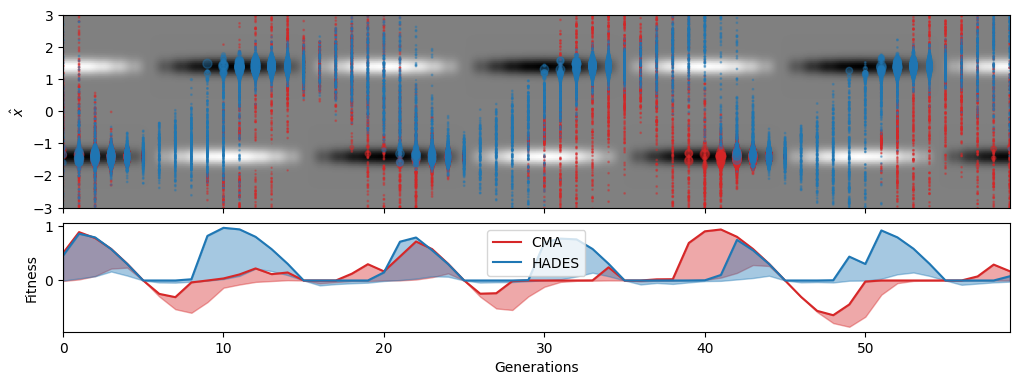

In [46]:
from analysis import load_benchmark

# Simple CMA
objective.t = 0
df = load_benchmark(objective="OscillatingDoubleDip", es="CMAES", dst=DST, run_ids=[rc_cma[0][1]])
figure = plot(df, objective=objective, color="tab:red", label="CMA", s=12)

# HADES
df = load_benchmark(objective="OscillatingDoubleDip", es="HADES", dst=DST, run_ids=rc[0][1])
f, _ = plot(df, objective=None, color="tab:blue", legend=True, figure=figure, label="HADES")

f.savefig("imgs/dynamic_double_peak.png", transparent=True, dpi=300)

loading data from data/es_benchmark/optimize/paper_HADES/experiment_dynamic/ES_HADES-objective_OscillatingDoubleDip.h5
loading data from data/es_benchmark/optimize/paper_HADES/experiment_dynamic/ES_CMAES-objective_OscillatingDoubleDip.h5


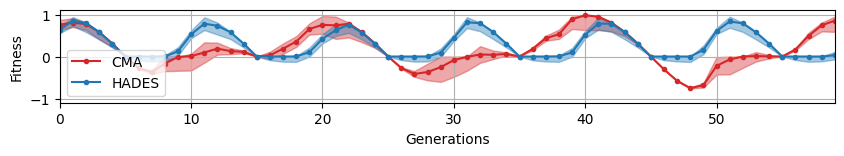

In [49]:
from analysis import load_benchmark
f, ax = plt.subplots(1, 1, figsize=(10, 1.2))

df_hades = load_benchmark(objective="OscillatingDoubleDip", es="HADES", dst=DST)
df_cma = load_benchmark(objective="OscillatingDoubleDip", es="CMAES", dst=DST)

def get_fitness_data(df):
    df = df.sort_values(["gen", "run"])

    max_fitness = []    
    for r, df_r in df.groupby("run"):
        df_r = df_r.sort_values("gen")
        f_max = np.array([v for v in df_r["fitness"].values]).max(axis=-1)
        max_fitness.append(f_max)

    mean_fitness = []
    std_fitness = []
    for g, df_g in df.groupby("gen"):
        f_mean = np.array([v for v in df_g["fitness"].values]).mean()
        f_std = np.array([v for v in df_g["fitness"].values]).std()
        mean_fitness.append(f_mean)
        std_fitness.append(f_std)
    return np.max(max_fitness, axis=0), np.mean(max_fitness, axis=0), np.array(mean_fitness), np.array(std_fitness)

for df, label, color in zip((df_cma, df_hades), 
                            ("CMA", "HADES", ), 
                            ("tab:red", "tab:blue", )):
    fmax, fmean, _, fstd = get_fitness_data(df)
    df = df.sort_values(["gen", "run"])
    gen = df["gen"].unique()
    ax.plot(gen, fmean, label=label, color=color, marker=".")
    ax.fill_between(gen, fmean - fstd, 
                    # fmax,
                    np.min([fmean + fstd, fmax], axis=0), 
                    color=color, alpha=0.4)

ax.set_ylabel("Fitness")
ax.set_xlabel("Generations")
ax.grid()
ax.set_xlim([0, 59])
ax.set_ylim([-1.1, 1.1])
ax.legend()
f.savefig("imgs/dynamic_double_peak_stat.pdf")

### PEPG

# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "t": 0, "foo": "OscillatingDoubleDip"}
# Loading Evolutionary Strategy
-  PEPG
- {"sigma_init": 1.0, "sigma_alpha": 0.2, "sigma_decay": 0.999, "sigma_limit": 0.01, "sigma_max_change": 0.2, "learning_rate": 0.01, "learning_rate_decay": 0.9999, "learning_rate_limit": 0.01, "elite_ratio": 0, "popsize": 256, "average_baseline": true, "weight_decay": 0.01, "reg": "l2", "rank_fitness": true, "forget_best": true, "x0": null}
# Results are saved 
- in folder `data/es_benchmark/optimize-experiment_dynamic`
- as `data/es_benchmark/optimize-experiment_dynamic/ES_PEPG-objective_OscillatingDoubleDip.h5`
- with run_id `1`.
  { "Generation": 0, "Max-Fitness": 0.7988017797470093, "Avg-Fitness": -1.5384256368822236e-10}
  { "Generation": 1, "Max-Fitness": 0.9302958250045776, "Avg-Fitness": 1.0008754935

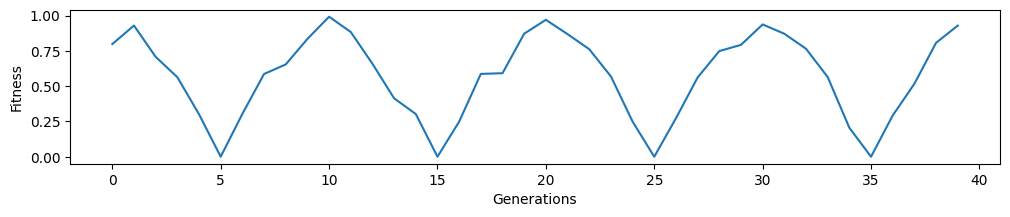

<Figure size 640x480 with 0 Axes>

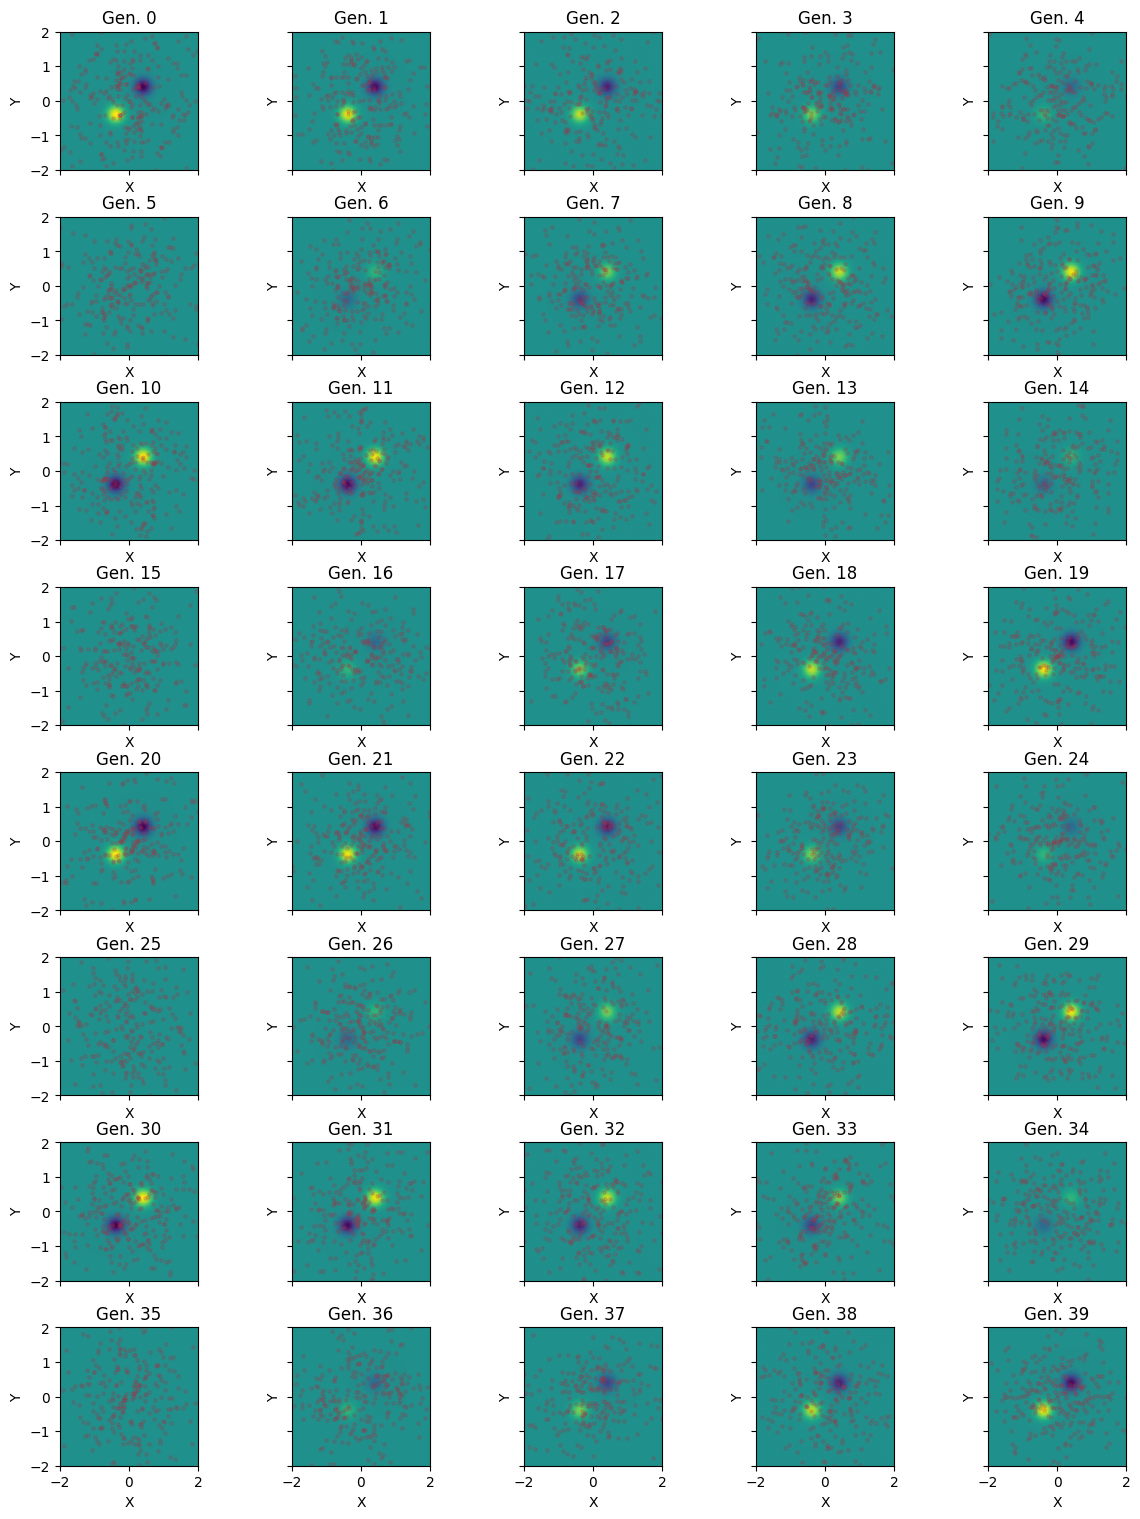

In [28]:
objective.t = 0
rc = run(objective=objective,
         generations=GENS,
         es="PEPG",
         diff=None,
         dst=DST,
         )

df = load_benchmark(objective="OscillatingDoubleDip", es="PEPG", dst=DST, run_ids=rc[1])
objective.t = 0
plot(df, objective=objective)

### OpenAI

# Loading Objective:
<class 'foobench.objective.Objective'> True
-  {"dim": 2, "foo_module": "foobench.dynamic", "foo_kwargs": {}, "maximize": false, "limits": 4, "apply_limits": false, "limit_val": 0.0, "t": 0, "foo": "OscillatingDoubleDip"}
# Loading Evolutionary Strategy
-  OpenES
- {"sigma_init": 1.0, "sigma_decay": 0.999, "sigma_limit": 0.01, "learning_rate": 0.01, "learning_rate_decay": 0.9999, "learning_rate_limit": 0.001, "popsize": 256, "antithetic": false, "weight_decay": 0.01, "reg": "l2", "rank_fitness": true, "forget_best": true, "x0": null}
# Results are saved 
- in folder `data/es_benchmark/optimize-experiment_dynamic`
- as `data/es_benchmark/optimize-experiment_dynamic/ES_OpenES-objective_OscillatingDoubleDip.h5`
- with run_id `0`.
  { "Generation": 0, "Max-Fitness": 0.8848375082015991, "Avg-Fitness": 0.004260017536580563}
  { "Generation": 1, "Max-Fitness": 0.9481960535049438, "Avg-Fitness": 0.014736494049429893}
  { "Generation": 2, "Max-Fitness": 0.7411081194877625, 

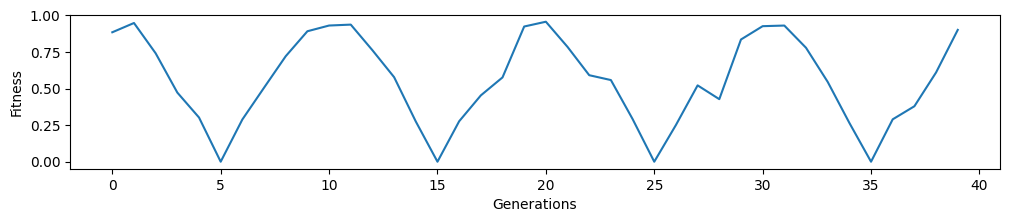

<Figure size 640x480 with 0 Axes>

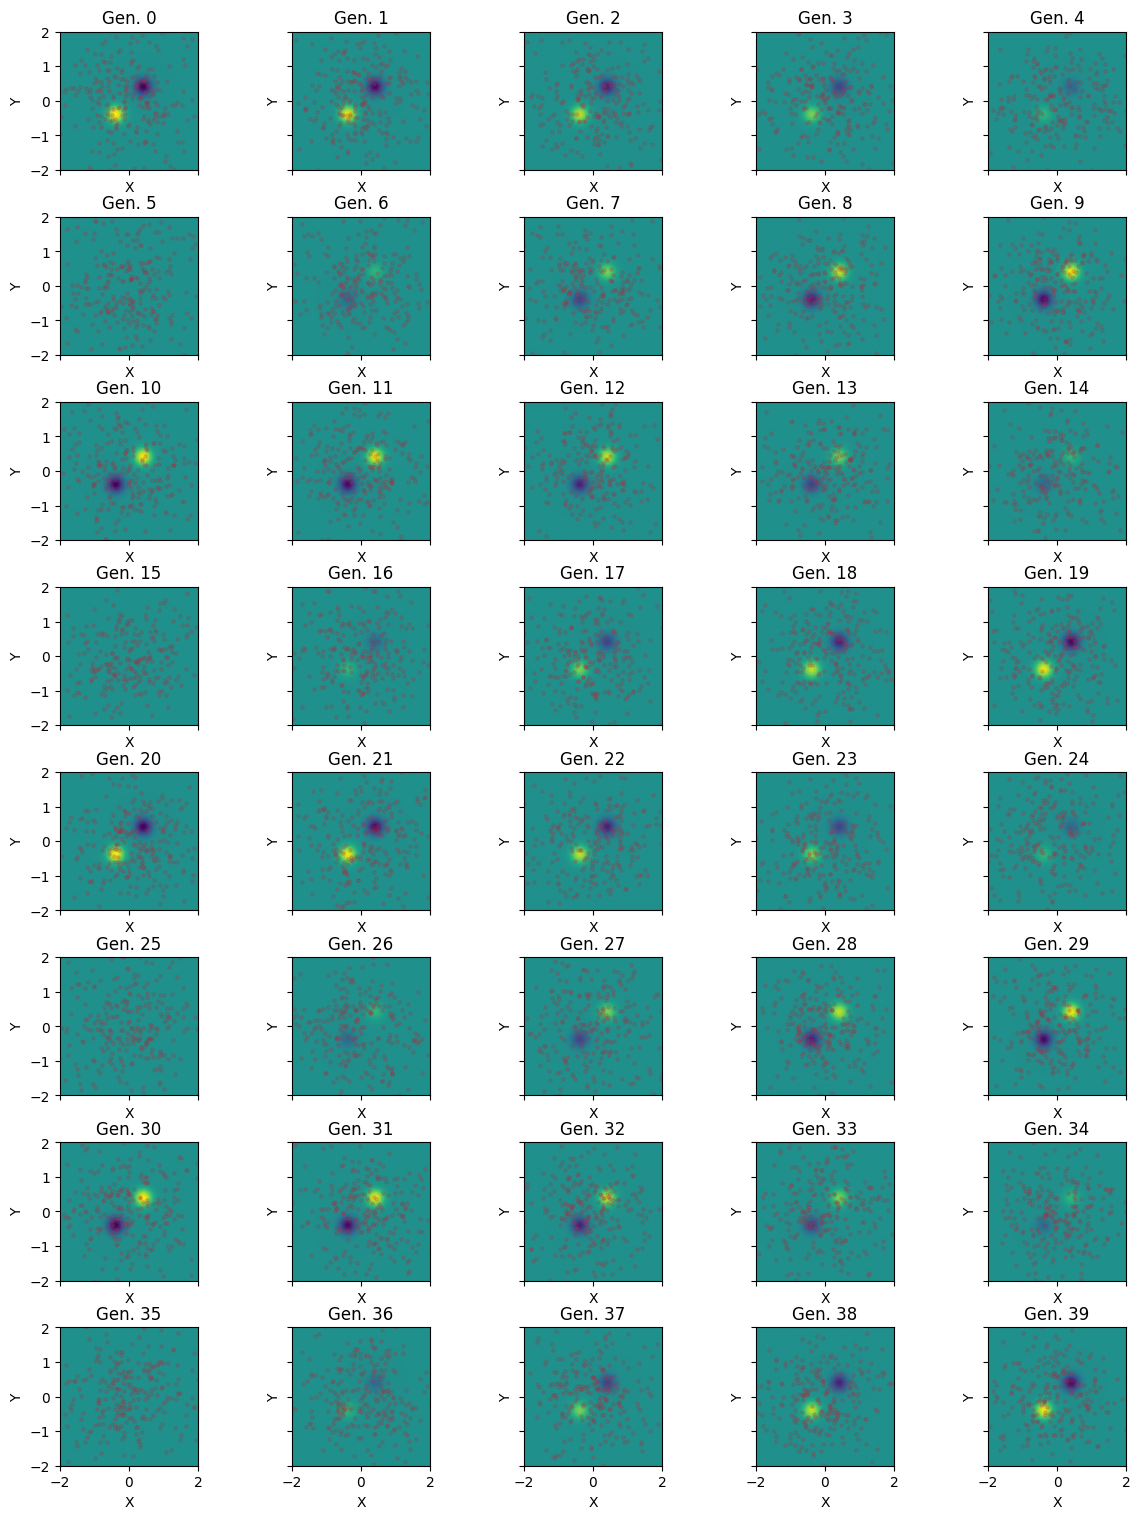

In [29]:
objective.t = 0
rc = run(objective=objective,
         generations=GENS,
         es="OpenES",
         diff=None,
         dst=DST,
         )

df = load_benchmark(objective="OscillatingDoubleDip", es="OpenES", dst=DST, run_ids=rc[1])
objective.t = 0
plot(df, objective=objective)